# 7. 앙상블 (Ensemble)
---
### 앙상블 학습 (Ensemble Learning)
- 여러개의 분류기를 생성하고 예측을 결합하여 보다 정확한 최종 예측을 도출하는 기법
- 보팅 (Voting)
- 배깅 (Bagging) : Bootstrap Aggregating 의 줄임말
- 부스팅 (Boosting)
![Alt text](image-111.png)
---
### 보팅
- 하드 보팅 (Hard Voting)  
-다수결 원칙  
-다수의 분류기가 결정한 예측 값을 최종 결과값으로 함
![Alt text](image-112.png)
- 소프트 보팅 (Soft Voting)  
-각 분류기의 레이블 값 결정 확률을 평균하여 가장 확률이 높은 레이블 값을 최종 결과값으로 함
![Alt text](image-113.png)

In [1]:
# 보팅 분류기 (Voting Classifier)

import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
lr = LogisticRegression(solver = 'liblinear')
knn = KNeighborsClassifier(n_neighbors = 8)
voting = VotingClassifier(estimators = [('LR', lr), ('KNN', knn)], voting = 'soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = 0.2)

lr.fit(X_train, y_train)
y_hat = lr.predict(X_test)
print(accuracy_score(y_test, y_hat))

knn.fit(X_train, y_train)
y_hat = knn.predict(X_test)
print(accuracy_score(y_test, y_hat))

voting.fit(X_train, y_train)
y_hat = voting.predict(X_test)
print(accuracy_score(y_test, y_hat))

0.9649122807017544
0.9649122807017544
0.9736842105263158


### 랜덤 포레스트 (Random Forest)
- 배깅 (Bagging) 의 대표적인 알고리즘
- 비교적 빠른 속도, 높은 예측 성능
- 여러 개의 결정 트리 분류기가 배깅 방식으로 각자의 데이터를 샘플링하여 개별적으로 학습  
-> 보팅을 통해 예측 결정  
![Alt text](image-114.png)
- 데이터 샘플링  
-부트스트랩 (Bootstrap) 분할 방식 : 데이터 세트를 중첩되게 분리  
-서브세트의 데이터 수는 전체 데이터 수와 동일  
-개별 데이터가 중첩되어 만들어짐  
-원본 데이터 수 : 10개, 3개의 결정 트리
![Alt text](image-115.png)
- 특징 선택  
-중복 허용 X  
-전체 특징 개수 m -> 선택한 특징 개수 루트m

In [3]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_hat = rf.predict(X_test)
print(accuracy_score(y_test, y_hat))

0.9824561403508771


- 하이퍼 파라미터 튜닝  
-n_estimators : 결정 트리의 개수 (기본 값 : 10)  
-max_features : 결정 트리의 max_features 와 같음 (기본 값 : 'auto')  
-max_depth  
-min_samples_leaf

In [4]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [10, 20, 30, 40, 50],
    'max_depth' : [10, 12, 14],
    'min_samples_leaf' : [4, 6, 8],
    'min_samples_split' : [4, 6, 8]
}

rf = RandomForestClassifier(n_jobs = -1)
cv = GridSearchCV(rf, param_grid = params, cv = 5, n_jobs = -1)
cv.fit(X_train, y_train)

print(cv.best_params_)
print(cv.best_score_)

{'max_depth': 14, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 40}
0.9582417582417582


In [5]:
rf = RandomForestClassifier(n_estimators = 40, max_depth = 12, min_samples_leaf = 4, min_samples_split = 4)
rf.fit(X_train, y_train)
y_hat = rf.predict(X_test)
print(accuracy_score(y_test, y_hat))

0.9736842105263158


<BarContainer object of 20 artists>

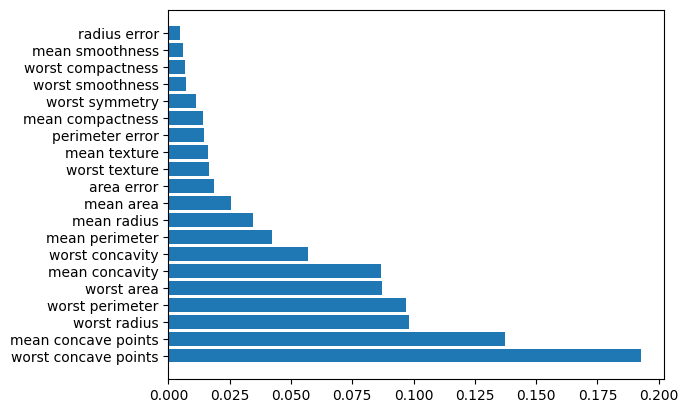

In [6]:
# 피처 중요도

import matplotlib.pyplot as plt

imp_values = rf.feature_importances_
imp = pd.DataFrame(data = imp_values, columns = ['value'])
imp['name'] = cancer.feature_names
top20 = imp.sort_values(by = 'value', ascending = False)[:20]
plt.barh(top20['name'], top20['value'])

### 부스팅
- 부스팅 알고리즘  
-여러 개의 약한 학습기를 순차적으로 학습, 예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식
---
### AdaBoost
![Alt text](image-117.png)
![Alt text](image-118.png)
![Alt text](image-119.png)
![Alt text](image-120.png)
---
---
### GBM (Gradient Boosting Machine)
- AdaBoost : 오답에 가중치 부여
- GBM : 잔차 (Residual) 에 집중  
-잔차를 최소화하는 과정에서 경사 하강법(Gradient Descent) 사용
![Alt text](image-121.png)

In [7]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)
y_hat = gbm.predict(X_test)
print(accuracy_score(y_test, y_hat))

0.9824561403508771


In [8]:
# 하이퍼 파라미터 튜닝

params = {
    'n_estimators' : [400, 500, 600],
    'learning_rate' : [0.02, 0.05, 0.1]
}
cv = GridSearchCV(gbm, param_grid = params, cv = 5)
cv.fit(X_train, y_train)
print(cv.best_params_)
print(cv.best_score_)

{'learning_rate': 0.05, 'n_estimators': 400}
0.956043956043956


In [9]:
y_hat = cv.best_estimator_.predict(X_test)
print(accuracy_score(y_test, y_hat))

0.9912280701754386


##### 장점  
- 일반적으로 GBM 이 좀 더 좋은 결과
##### 단점  
- 수행시간이 오래 걸림  
- 하이퍼 파라미터 튜닝에 더 많은 노력  
- 병렬처리가 지원되지 않음

# XGBoost (eXtreme Gradient Boosting)
### 오픈소스 소프트웨어 라이브러리
### 압도적인 차이는 아니지만 일반적으로 다른 방법보다 뛰어난 성능
### GBM 에 기반
### GBM 의 단점인 느린 수행 시간, 과적합 규제 부재 등의 문제 해결
### 병렬 CPU 환경에서 병렬 학습 가능
### GBM 에 비해 빠르다는 것이지 다른 방법 (핸덤 포레스트 등) 보다 빠르다는 것은 아님
---
### 주요 파라미터
- n_estimators : 트리 개수
- learning_rate : 학습률, 기본 값 0.3, 보통은 0.01 ~ 0.2
- min_child_weight : 기본 값 1, 트리에서 추가적으로 가지를 나눌지 결정하기 위해 필요한 데이터들의 가중치 합, 클수록 분할을 자제
- gamma : min_split_loss 와 같음, 기본 값 0, 리프 노드를 추가적으로 나눌지 결정할 최소 손실 감소 값, 값이 클수록 과적합 감소 효과
- max_depth : 기본 값 6, 값이 0이면 무제한
- subsample : 기본 값 1, 데이터를 샘플링하는 비율, 보통 0.5 ~ 1
- colsample_bytree : GBM 의 max_features 와 유사, 기본 값 1, 트리 생성에 필요한 피처를 임의로 샘플링하는 데 사용

In [10]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
from xgboost import XGBClassifier

def evaluate(y_test, y_hat, y_prob):
    print(confusion_matrix(y_test, y_hat))
    print(accuracy_score(y_test, y_hat))
    print(precision_score(y_test, y_hat))
    print(recall_score(y_test, y_hat))
    print(f1_score(y_test, y_hat))
    print(roc_auc_score(y_test, y_prob))
    
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = 0.2)
xgb = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3)
xgb.fit(X_train, y_train)
y_hat = xgb.predict(X_test)
y_prob = xgb.predict_proba(X_test)[:, 1]
evaluate(y_test, y_hat, y_prob)

[[43  4]
 [ 3 64]]
0.9385964912280702
0.9411764705882353
0.9552238805970149
0.9481481481481482
0.9838043823436011


### 조기 중단 기능
- n_estimators 횟수에 도달하지 않고도 예측 오류가 더 이상 개선되지 않으면 중지
- 예) 조기 중단 파라미터 50일 때  
100회에서 학습 오류 값 0.8 인데 101 ~ 150 회 동안 예측 오류가 0.8 보다 작은 값이 하나도 없으면 중지

In [11]:
# 유방암 예측

xgb = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3, early_stopping_rounds = 100, eval_metric = 'logloss')
xgb.fit(X_train, y_train, eval_set = [(X_test, y_test)])
y_hat100 = xgb.predict(X_test)
y_prob100 = xgb.predict_proba(X_test)[:, 1]

[0]	validation_0-logloss:0.60969
[1]	validation_0-logloss:0.55043
[2]	validation_0-logloss:0.50001
[3]	validation_0-logloss:0.46217
[4]	validation_0-logloss:0.42685
[5]	validation_0-logloss:0.39796
[6]	validation_0-logloss:0.37397
[7]	validation_0-logloss:0.35552
[8]	validation_0-logloss:0.33736
[9]	validation_0-logloss:0.32428
[10]	validation_0-logloss:0.31034
[11]	validation_0-logloss:0.29773
[12]	validation_0-logloss:0.28759
[13]	validation_0-logloss:0.27701
[14]	validation_0-logloss:0.27181
[15]	validation_0-logloss:0.26664
[16]	validation_0-logloss:0.26179
[17]	validation_0-logloss:0.25860
[18]	validation_0-logloss:0.25641
[19]	validation_0-logloss:0.25509
[20]	validation_0-logloss:0.25152
[21]	validation_0-logloss:0.24599
[22]	validation_0-logloss:0.24329
[23]	validation_0-logloss:0.23934
[24]	validation_0-logloss:0.23816
[25]	validation_0-logloss:0.23812
[26]	validation_0-logloss:0.23432
[27]	validation_0-logloss:0.23422
[28]	validation_0-logloss:0.23196
[29]	validation_0-loglos

![Alt text](image-124.png)

In [12]:
evaluate(y_test, y_hat100, y_prob100)

[[43  4]
 [ 3 64]]
0.9385964912280702
0.9411764705882353
0.9552238805970149
0.9481481481481482
0.9831692600825659


In [13]:
xgb = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3, early_stopping_rounds = 10, eval_metric = 'logloss')
xgb.fit(X_train, y_train, eval_set = [(X_test, y_test)])
y_hat10 = xgb.predict(X_test)
y_prob10 = xgb.predict_proba(X_test)[:, 1]
evaluate(y_test, y_hat10, y_prob10)

[0]	validation_0-logloss:0.60969
[1]	validation_0-logloss:0.55043
[2]	validation_0-logloss:0.50001
[3]	validation_0-logloss:0.46217
[4]	validation_0-logloss:0.42685
[5]	validation_0-logloss:0.39796
[6]	validation_0-logloss:0.37397
[7]	validation_0-logloss:0.35552
[8]	validation_0-logloss:0.33736
[9]	validation_0-logloss:0.32428
[10]	validation_0-logloss:0.31034
[11]	validation_0-logloss:0.29773
[12]	validation_0-logloss:0.28759
[13]	validation_0-logloss:0.27701
[14]	validation_0-logloss:0.27181
[15]	validation_0-logloss:0.26664
[16]	validation_0-logloss:0.26179
[17]	validation_0-logloss:0.25860
[18]	validation_0-logloss:0.25641
[19]	validation_0-logloss:0.25509
[20]	validation_0-logloss:0.25152
[21]	validation_0-logloss:0.24599
[22]	validation_0-logloss:0.24329
[23]	validation_0-logloss:0.23934
[24]	validation_0-logloss:0.23816
[25]	validation_0-logloss:0.23812
[26]	validation_0-logloss:0.23432
[27]	validation_0-logloss:0.23422
[28]	validation_0-logloss:0.23196
[29]	validation_0-loglos

# LightGBM
### XGBoost
- GBM 보다는 빠르지만 여전히 학습 시간이 오래 걸림
### LightGBM
- XGBoost 보다 빠르며 메모리 사용량도 적음
- 예측 성능은 XGBoost 와 별 차이가 없음
- 단점 : 적은 데이터 세트 (1만건 이하) 로 학습할 경우 과적합이 발생하기 쉬움
---
# 트리 분할 방식
### 기존 방식 (균형 트리 분할 방식)
- 최대한 균형 잡힌 트리를 유지
- 장점 : 과적합에 강한 구조
- 단점 : 균형을 맞추기 위한 시간 필요
### LightGBM (리프 중심 트리 분할 방식)
- 균형을 맞추지 않고 최대 손실 값을 갖는 리프 노드를 분할  
-> 트리의 깊이가 깊어지고 비대칭적인 트리 생성
- 하지만 학습을 반복할 수록 결국은 트리 분할 방식보다 예측 오류 손실을 최소화
---
### LightGBM 의 XGBoost 대비 장점
- 더 빠른 학습과 예측 수행 시간
- 더 적은 메모리 사용량
- 카테고리형 피처의 자동 변환과 최적 분할 :  
원핫 인코딩 등을 사용하지 않고도 카테고리형 피처를 최적으로 변환하고 노드 분할 수행
### XGBoost 와 마찬가지로 뛰어난 예측 성능 및 병렬 컴퓨팅 기능 제공, 최근에는 GPU 까지 지원
---
### LightGBM 하이퍼 파라미터
- n_estimators : 기본 값 100, 트리의 개수  
크게 하면 예측 성능 높아질 수 있으나 너무 크게 하면 과적합으로 성능 저하될 수 있음
- learning_rate : 기본 값 0.1, 학습률  
작게 해서 예측 성능 높일 수 있으나 과적합 가능 및 학습 시간 증가
- max_depth : 기본 값 -1 (무제한)  
LightGBM 의 경우 리프 노드가 계속 분할되므로 max_depth 를 크게 해주어야 함
- min_child_samples : 기본 값 20  
리프 노드가 되기 위해 필요한 데이터 수, 과적합 제어용
- num_leaves : 기본 값 31  
하나의 트리가 가질 수 있는 최대 리프의 개수
- boosting : 기본 값 gbdt  
트리를 생성하는 알고리즘  
-gdbt : 일반적인 그래디언트 부스팅 결정 트리  
-rf : 랜덤 포레스트
- subsample : 기본 값 1  
데이터를 샘플링하는 비율, 과적합 제어용
- colsample_bytree : 기본 값 1  
개별 트리를 학습할 때마다 무작위로 선택하는 피처의 비율, 과적합 제어용
- reg_lambda : 기본 값 0  
L2 regulation 제어, 값이 클수록 과적합 감소 효과
- reg_alpha : 기본 값 0  
L1 regulation 제어, 과적합 제어용
- objective : 손실함수 지정 (회귀, 다중 클래스 분류, 이진 클래스 분류 등)
---
### LightGBM 하이퍼 파라미터 튜닝 방안
- num_leaves
-개별 트리의 최대 리프 개수  
-LightGBM 의 복잡도 제어  
-크게 하면 정확도 높아지지만 복잡도가 증가해 과적합 가능
- min_child_samples  
-일반적으로 큰 값으로 하면 트리가 깊어지는 것 방지
- max_depth  
-깊이 제한  
-과적합 개선에 사용

In [14]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(n_estimators = 400, early_stopping_rounds = 100, eval_metric = 'logloss')
lgbm.fit(X_train, y_train, eval_set = [(X_test, y_test)])
y_hat = lgbm.predict(X_test)
y_prob = lgbm.predict_proba(X_test)[:, 1]
evaluate(y_test, y_hat, y_prob)

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Warning] Unknown parameter: eval_metric


[LightGBM] [Info] Number of positive: 290, number of negative: 165
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000311 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4542
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.637363 -> initscore=0.563935
[LightGBM] [Info] Start training from score 0.563935
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

![Alt text](image-126.png)

# 산탄데르 고객 만족 예측
### - 산탄데르 은행의 고객 만족 여부
### - 클래스 레이블 : TARGET
- 1 : 불만
- 0 : 만족
### - 대부분 만족이므로 정확도보다 ROC-AUC 로 평가

In [15]:
# 데이터 읽기

import pandas as pd

df = pd.read_csv('C:/woogi/KWU/3-2/Machine_Learning/train_Santander_Customer_Satisfaction.csv')
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [17]:
# 전처리

print(df['TARGET'].value_counts())

TARGET
0    73012
1     3008
Name: count, dtype: int64


In [18]:
cnt = df[df['TARGET'] == 1]['TARGET'].count()
total_cnt = df['TARGET'].count()
print(cnt / total_cnt)

0.0395685345961589


In [19]:
df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [20]:
df['var3'].replace(-9999999, 2, inplace = True)
df.drop('ID', axis = 1, inplace = True)

![Alt text](image-127.png)

In [21]:
# 데이터 분할

from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

train_cnt = y_train.count()
test_cnt = y_test.count()
print(y_train.value_counts() / train_cnt)
print(y_test.value_counts() / test_cnt)


TARGET
0    0.960438
1    0.039562
Name: count, dtype: float64
TARGET
0    0.960405
1    0.039595
Name: count, dtype: float64


In [22]:
# XGBoost
# 학습

from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

xgb = XGBClassifier(n_estimators = 500, early_stopping_rounds = 100, eval_metric = "auc")
xgb.fit(X_train, y_train, eval_set = [(X_test, y_test)])
y_prob = xgb.predict_proba(X_test)[:, 1]
print(roc_auc_score(y_test, y_prob))

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[0]	validation_0-auc:0.82249
[1]	validation_0-auc:0.82585
[2]	validation_0-auc:0.82817
[3]	validation_0-auc:0.83171
[4]	validation_0-auc:0.83008
[5]	validation_0-auc:0.83034


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[6]	validation_0-auc:0.82987
[7]	validation_0-auc:0.83130
[8]	validation_0-auc:0.83132
[9]	validation_0-auc:0.83080
[10]	validation_0-auc:0.83103
[11]	validation_0-auc:0.83149
[12]	validation_0-auc:0.83171
[13]	validation_0-auc:0.83276
[14]	validation_0-auc:0.83263
[15]	validation_0-auc:0.83252
[16]	validation_0-auc:0.83242
[17]	validation_0-auc:0.83238
[18]	validation_0-auc:0.83173
[19]	validation_0-auc:0.83184
[20]	validation_0-auc:0.83081
[21]	validation_0-auc:0.83090
[22]	validation_0-auc:0.83092
[23]	validation_0-auc:0.83028
[24]	validation_0-auc:0.83041
[25]	validation_0-auc:0.83018
[26]	validation_0-auc:0.83040
[27]	validation_0-auc:0.82917
[28]	validation_0-auc:0.82900
[29]	validation_0-auc:0.82881
[30]	validation_0-auc:0.82846
[31]	validation_0-auc:0.82839
[32]	validation_0-auc:0.82852
[33]	validation_0-auc:0.82856
[34]	validation_0-auc:0.82872
[35]	validation_0-auc:0.82880
[36]	validation_0-auc:0.82849
[37]	validation_0-auc:0.82853
[38]	validation_0-auc:0.82830
[39]	validatio

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

In [23]:
# 파라미터 튜닝

from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier(n_estimators = 100, early_stopping_rounds = 30, eval_metric = "auc")
params = {
    'max_depth' : [5, 7],
    'min_child_weight' : [1, 3],
    'colsample_bytree' : [0.5, 0.75]
}
cv = GridSearchCV(xgb, param_grid = params, cv = 5)
cv.fit(X_train, y_train, eval_set = [(X_test, y_test)])
print(cv.best_params_)
y_prob = cv.predict_proba(X_test)[:, 1]
print(roc_auc_score(y_test, y_prob))

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[0]	validation_0-auc:0.75257
[1]	validation_0-auc:0.75609
[2]	validation_0-auc:0.76410
[3]	validation_0-auc:0.80727
[4]	validation_0-auc:0.80297
[5]	validation_0-auc:0.81692
[6]	validation_0-auc:0.82338
[7]	validation_0-auc:0.82100
[8]	validation_0-auc:0.82147


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[9]	validation_0-auc:0.82504
[10]	validation_0-auc:0.82303
[11]	validation_0-auc:0.82687
[12]	validation_0-auc:0.82545
[13]	validation_0-auc:0.82551
[14]	validation_0-auc:0.82521
[15]	validation_0-auc:0.82523
[16]	validation_0-auc:0.82430
[17]	validation_0-auc:0.82499
[18]	validation_0-auc:0.82811
[19]	validation_0-auc:0.82929
[20]	validation_0-auc:0.83029
[21]	validation_0-auc:0.83036
[22]	validation_0-auc:0.83053
[23]	validation_0-auc:0.83082
[24]	validation_0-auc:0.83101
[25]	validation_0-auc:0.83111
[26]	validation_0-auc:0.83097
[27]	validation_0-auc:0.83136
[28]	validation_0-auc:0.83118
[29]	validation_0-auc:0.83084
[30]	validation_0-auc:0.83059
[31]	validation_0-auc:0.83015
[32]	validation_0-auc:0.83137
[33]	validation_0-auc:0.83128
[34]	validation_0-auc:0.83163
[35]	validation_0-auc:0.83073
[36]	validation_0-auc:0.83051
[37]	validation_0-auc:0.83053
[38]	validation_0-auc:0.83032
[39]	validation_0-auc:0.83008
[40]	validation_0-auc:0.83011
[41]	validation_0-auc:0.82984
[42]	valida

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[0]	validation_0-auc:0.75211
[1]	validation_0-auc:0.76313
[2]	validation_0-auc:0.76190
[3]	validation_0-auc:0.80757
[4]	validation_0-auc:0.80486
[5]	validation_0-auc:0.81849
[6]	validation_0-auc:0.82478
[7]	validation_0-auc:0.82116
[8]	validation_0-auc:0.82054


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[9]	validation_0-auc:0.82508
[10]	validation_0-auc:0.82395
[11]	validation_0-auc:0.82697
[12]	validation_0-auc:0.82642
[13]	validation_0-auc:0.82667
[14]	validation_0-auc:0.82617
[15]	validation_0-auc:0.82677
[16]	validation_0-auc:0.82805
[17]	validation_0-auc:0.82759
[18]	validation_0-auc:0.83050
[19]	validation_0-auc:0.83156
[20]	validation_0-auc:0.83293
[21]	validation_0-auc:0.83247
[22]	validation_0-auc:0.83266
[23]	validation_0-auc:0.83247
[24]	validation_0-auc:0.83290
[25]	validation_0-auc:0.83309
[26]	validation_0-auc:0.83304
[27]	validation_0-auc:0.83350
[28]	validation_0-auc:0.83331
[29]	validation_0-auc:0.83321
[30]	validation_0-auc:0.83327
[31]	validation_0-auc:0.83462
[32]	validation_0-auc:0.83424
[33]	validation_0-auc:0.83407
[34]	validation_0-auc:0.83374
[35]	validation_0-auc:0.83334
[36]	validation_0-auc:0.83324
[37]	validation_0-auc:0.83298
[38]	validation_0-auc:0.83275
[39]	validation_0-auc:0.83280
[40]	validation_0-auc:0.83273
[41]	validation_0-auc:0.83255
[42]	valida

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[0]	validation_0-auc:0.75279
[1]	validation_0-auc:0.75928
[2]	validation_0-auc:0.76231
[3]	validation_0-auc:0.80820
[4]	validation_0-auc:0.80444
[5]	validation_0-auc:0.81678
[6]	validation_0-auc:0.82285


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[7]	validation_0-auc:0.82211
[8]	validation_0-auc:0.82290
[9]	validation_0-auc:0.82717
[10]	validation_0-auc:0.82807
[11]	validation_0-auc:0.83088
[12]	validation_0-auc:0.83030
[13]	validation_0-auc:0.83052
[14]	validation_0-auc:0.82957
[15]	validation_0-auc:0.82961
[16]	validation_0-auc:0.82912
[17]	validation_0-auc:0.82885
[18]	validation_0-auc:0.83074
[19]	validation_0-auc:0.83216
[20]	validation_0-auc:0.83378
[21]	validation_0-auc:0.83316
[22]	validation_0-auc:0.83313
[23]	validation_0-auc:0.83278
[24]	validation_0-auc:0.83302
[25]	validation_0-auc:0.83261
[26]	validation_0-auc:0.83212
[27]	validation_0-auc:0.83303
[28]	validation_0-auc:0.83313
[29]	validation_0-auc:0.83260
[30]	validation_0-auc:0.83232
[31]	validation_0-auc:0.83251
[32]	validation_0-auc:0.83319
[33]	validation_0-auc:0.83344
[34]	validation_0-auc:0.83311
[35]	validation_0-auc:0.83226
[36]	validation_0-auc:0.83198
[37]	validation_0-auc:0.83179
[38]	validation_0-auc:0.83167
[39]	validation_0-auc:0.83194
[40]	validati

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[0]	validation_0-auc:0.75234
[1]	validation_0-auc:0.75530
[2]	validation_0-auc:0.75630
[3]	validation_0-auc:0.80617
[4]	validation_0-auc:0.80334
[5]	validation_0-auc:0.81693
[6]	validation_0-auc:0.82341
[7]	validation_0-auc:0.82212


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[8]	validation_0-auc:0.82168
[9]	validation_0-auc:0.82706
[10]	validation_0-auc:0.82608
[11]	validation_0-auc:0.83006
[12]	validation_0-auc:0.82951
[13]	validation_0-auc:0.82900
[14]	validation_0-auc:0.82909
[15]	validation_0-auc:0.82937
[16]	validation_0-auc:0.82941
[17]	validation_0-auc:0.82941
[18]	validation_0-auc:0.83142
[19]	validation_0-auc:0.83274
[20]	validation_0-auc:0.83401
[21]	validation_0-auc:0.83362
[22]	validation_0-auc:0.83382
[23]	validation_0-auc:0.83359
[24]	validation_0-auc:0.83360
[25]	validation_0-auc:0.83353
[26]	validation_0-auc:0.83310
[27]	validation_0-auc:0.83302
[28]	validation_0-auc:0.83289
[29]	validation_0-auc:0.83294
[30]	validation_0-auc:0.83270
[31]	validation_0-auc:0.83335
[32]	validation_0-auc:0.83330
[33]	validation_0-auc:0.83335
[34]	validation_0-auc:0.83302
[35]	validation_0-auc:0.83278
[36]	validation_0-auc:0.83275
[37]	validation_0-auc:0.83255
[38]	validation_0-auc:0.83260
[39]	validation_0-auc:0.83237
[40]	validation_0-auc:0.83294
[41]	validat

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[0]	validation_0-auc:0.75276
[1]	validation_0-auc:0.75959
[2]	validation_0-auc:0.75750
[3]	validation_0-auc:0.80798
[4]	validation_0-auc:0.80572
[5]	validation_0-auc:0.81835
[6]	validation_0-auc:0.82453
[7]	validation_0-auc:0.82197
[8]	validation_0-auc:0.82183


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[9]	validation_0-auc:0.82654
[10]	validation_0-auc:0.82513
[11]	validation_0-auc:0.82730
[12]	validation_0-auc:0.82579
[13]	validation_0-auc:0.82573
[14]	validation_0-auc:0.82597
[15]	validation_0-auc:0.82628
[16]	validation_0-auc:0.82615
[17]	validation_0-auc:0.82630
[18]	validation_0-auc:0.82985
[19]	validation_0-auc:0.83024
[20]	validation_0-auc:0.83072
[21]	validation_0-auc:0.83085
[22]	validation_0-auc:0.83093
[23]	validation_0-auc:0.83066
[24]	validation_0-auc:0.83075
[25]	validation_0-auc:0.83036
[26]	validation_0-auc:0.83038
[27]	validation_0-auc:0.83129
[28]	validation_0-auc:0.83096
[29]	validation_0-auc:0.83110
[30]	validation_0-auc:0.83098
[31]	validation_0-auc:0.83077
[32]	validation_0-auc:0.83023
[33]	validation_0-auc:0.83035
[34]	validation_0-auc:0.83049
[35]	validation_0-auc:0.83075
[36]	validation_0-auc:0.83081
[37]	validation_0-auc:0.83054
[38]	validation_0-auc:0.83050
[39]	validation_0-auc:0.83039
[40]	validation_0-auc:0.83068
[41]	validation_0-auc:0.83053
[42]	valida

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[0]	validation_0-auc:0.75244
[1]	validation_0-auc:0.75579
[2]	validation_0-auc:0.75809
[3]	validation_0-auc:0.80578
[4]	validation_0-auc:0.80131
[5]	validation_0-auc:0.81574
[6]	validation_0-auc:0.82145


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[7]	validation_0-auc:0.81830
[8]	validation_0-auc:0.81863
[9]	validation_0-auc:0.82309
[10]	validation_0-auc:0.82142
[11]	validation_0-auc:0.82553
[12]	validation_0-auc:0.82626
[13]	validation_0-auc:0.82561
[14]	validation_0-auc:0.82511
[15]	validation_0-auc:0.82544
[16]	validation_0-auc:0.82496
[17]	validation_0-auc:0.82374
[18]	validation_0-auc:0.82609
[19]	validation_0-auc:0.82792
[20]	validation_0-auc:0.82896
[21]	validation_0-auc:0.82817
[22]	validation_0-auc:0.82826
[23]	validation_0-auc:0.82841
[24]	validation_0-auc:0.82831
[25]	validation_0-auc:0.82797
[26]	validation_0-auc:0.82807
[27]	validation_0-auc:0.82870
[28]	validation_0-auc:0.82871
[29]	validation_0-auc:0.82853
[30]	validation_0-auc:0.82806
[31]	validation_0-auc:0.82756
[32]	validation_0-auc:0.82758
[33]	validation_0-auc:0.82718
[34]	validation_0-auc:0.82681
[35]	validation_0-auc:0.82684
[36]	validation_0-auc:0.82669
[37]	validation_0-auc:0.82716
[38]	validation_0-auc:0.82663
[39]	validation_0-auc:0.82665
[40]	validati

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[0]	validation_0-auc:0.75151
[1]	validation_0-auc:0.76391
[2]	validation_0-auc:0.76106
[3]	validation_0-auc:0.80943
[4]	validation_0-auc:0.80642
[5]	validation_0-auc:0.81841
[6]	validation_0-auc:0.82478
[7]	validation_0-auc:0.82273


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[8]	validation_0-auc:0.82218
[9]	validation_0-auc:0.82639
[10]	validation_0-auc:0.82584
[11]	validation_0-auc:0.82796
[12]	validation_0-auc:0.82790
[13]	validation_0-auc:0.82747
[14]	validation_0-auc:0.82680
[15]	validation_0-auc:0.82626
[16]	validation_0-auc:0.82819
[17]	validation_0-auc:0.82819
[18]	validation_0-auc:0.83058
[19]	validation_0-auc:0.83225
[20]	validation_0-auc:0.83319
[21]	validation_0-auc:0.83306
[22]	validation_0-auc:0.83261
[23]	validation_0-auc:0.83317
[24]	validation_0-auc:0.83330
[25]	validation_0-auc:0.83365
[26]	validation_0-auc:0.83336
[27]	validation_0-auc:0.83345
[28]	validation_0-auc:0.83379
[29]	validation_0-auc:0.83416
[30]	validation_0-auc:0.83409
[31]	validation_0-auc:0.83435
[32]	validation_0-auc:0.83441
[33]	validation_0-auc:0.83439
[34]	validation_0-auc:0.83363
[35]	validation_0-auc:0.83367
[36]	validation_0-auc:0.83369
[37]	validation_0-auc:0.83349
[38]	validation_0-auc:0.83338
[39]	validation_0-auc:0.83348
[40]	validation_0-auc:0.83329
[41]	validat

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[0]	validation_0-auc:0.74819
[1]	validation_0-auc:0.75713
[2]	validation_0-auc:0.76022
[3]	validation_0-auc:0.80916
[4]	validation_0-auc:0.80584
[5]	validation_0-auc:0.81625
[6]	validation_0-auc:0.82259
[7]	validation_0-auc:0.82041
[8]	validation_0-auc:0.82152


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[9]	validation_0-auc:0.82588
[10]	validation_0-auc:0.82577
[11]	validation_0-auc:0.82796
[12]	validation_0-auc:0.82724
[13]	validation_0-auc:0.82711
[14]	validation_0-auc:0.82736
[15]	validation_0-auc:0.82753
[16]	validation_0-auc:0.82767
[17]	validation_0-auc:0.82639
[18]	validation_0-auc:0.82888
[19]	validation_0-auc:0.83010
[20]	validation_0-auc:0.83093
[21]	validation_0-auc:0.83055
[22]	validation_0-auc:0.83060
[23]	validation_0-auc:0.83048
[24]	validation_0-auc:0.83062
[25]	validation_0-auc:0.83048
[26]	validation_0-auc:0.83008
[27]	validation_0-auc:0.83047
[28]	validation_0-auc:0.83040
[29]	validation_0-auc:0.83059
[30]	validation_0-auc:0.83053
[31]	validation_0-auc:0.83066
[32]	validation_0-auc:0.83124
[33]	validation_0-auc:0.83102
[34]	validation_0-auc:0.83089
[35]	validation_0-auc:0.83119
[36]	validation_0-auc:0.83071
[37]	validation_0-auc:0.83050
[38]	validation_0-auc:0.83036
[39]	validation_0-auc:0.83020
[40]	validation_0-auc:0.82999
[41]	validation_0-auc:0.83016
[42]	valida

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[0]	validation_0-auc:0.75598
[1]	validation_0-auc:0.75903
[2]	validation_0-auc:0.75889
[3]	validation_0-auc:0.80755
[4]	validation_0-auc:0.80297
[5]	validation_0-auc:0.81708
[6]	validation_0-auc:0.82403
[7]	validation_0-auc:0.82258


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[8]	validation_0-auc:0.82275
[9]	validation_0-auc:0.82672
[10]	validation_0-auc:0.82848
[11]	validation_0-auc:0.83172
[12]	validation_0-auc:0.83200
[13]	validation_0-auc:0.83183
[14]	validation_0-auc:0.83194
[15]	validation_0-auc:0.83155
[16]	validation_0-auc:0.83161
[17]	validation_0-auc:0.83038
[18]	validation_0-auc:0.83250
[19]	validation_0-auc:0.83396
[20]	validation_0-auc:0.83449
[21]	validation_0-auc:0.83429
[22]	validation_0-auc:0.83428
[23]	validation_0-auc:0.83407
[24]	validation_0-auc:0.83457
[25]	validation_0-auc:0.83491
[26]	validation_0-auc:0.83445
[27]	validation_0-auc:0.83432
[28]	validation_0-auc:0.83407
[29]	validation_0-auc:0.83493
[30]	validation_0-auc:0.83502
[31]	validation_0-auc:0.83504
[32]	validation_0-auc:0.83486
[33]	validation_0-auc:0.83460
[34]	validation_0-auc:0.83412
[35]	validation_0-auc:0.83383
[36]	validation_0-auc:0.83374
[37]	validation_0-auc:0.83379
[38]	validation_0-auc:0.83402
[39]	validation_0-auc:0.83442
[40]	validation_0-auc:0.83459
[41]	validat

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[0]	validation_0-auc:0.75068
[1]	validation_0-auc:0.75757
[2]	validation_0-auc:0.75661
[3]	validation_0-auc:0.80725
[4]	validation_0-auc:0.80611
[5]	validation_0-auc:0.81838
[6]	validation_0-auc:0.82434
[7]	validation_0-auc:0.82149


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[8]	validation_0-auc:0.82080
[9]	validation_0-auc:0.82585
[10]	validation_0-auc:0.82521
[11]	validation_0-auc:0.82686
[12]	validation_0-auc:0.82683
[13]	validation_0-auc:0.82601
[14]	validation_0-auc:0.82486
[15]	validation_0-auc:0.82529
[16]	validation_0-auc:0.82635
[17]	validation_0-auc:0.82611
[18]	validation_0-auc:0.82816
[19]	validation_0-auc:0.82951
[20]	validation_0-auc:0.83028
[21]	validation_0-auc:0.83019
[22]	validation_0-auc:0.83035
[23]	validation_0-auc:0.83056
[24]	validation_0-auc:0.83016
[25]	validation_0-auc:0.82982
[26]	validation_0-auc:0.82980
[27]	validation_0-auc:0.83032
[28]	validation_0-auc:0.83011
[29]	validation_0-auc:0.83010
[30]	validation_0-auc:0.83012
[31]	validation_0-auc:0.83041
[32]	validation_0-auc:0.83028
[33]	validation_0-auc:0.83038
[34]	validation_0-auc:0.83023
[35]	validation_0-auc:0.83054
[36]	validation_0-auc:0.83052
[37]	validation_0-auc:0.83054
[38]	validation_0-auc:0.83013
[39]	validation_0-auc:0.83002
[40]	validation_0-auc:0.82959
[41]	validat

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[0]	validation_0-auc:0.75649
[1]	validation_0-auc:0.76408
[2]	validation_0-auc:0.76479
[3]	validation_0-auc:0.80267
[4]	validation_0-auc:0.79967


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[5]	validation_0-auc:0.81356
[6]	validation_0-auc:0.81929
[7]	validation_0-auc:0.81480
[8]	validation_0-auc:0.81323
[9]	validation_0-auc:0.81931
[10]	validation_0-auc:0.81736
[11]	validation_0-auc:0.81995
[12]	validation_0-auc:0.81902
[13]	validation_0-auc:0.81897
[14]	validation_0-auc:0.81840
[15]	validation_0-auc:0.81783
[16]	validation_0-auc:0.81658
[17]	validation_0-auc:0.81602
[18]	validation_0-auc:0.81910
[19]	validation_0-auc:0.82197
[20]	validation_0-auc:0.82310
[21]	validation_0-auc:0.82231
[22]	validation_0-auc:0.82216
[23]	validation_0-auc:0.82217
[24]	validation_0-auc:0.82180
[25]	validation_0-auc:0.82175
[26]	validation_0-auc:0.82197
[27]	validation_0-auc:0.82230
[28]	validation_0-auc:0.82249
[29]	validation_0-auc:0.82224
[30]	validation_0-auc:0.82226
[31]	validation_0-auc:0.82210
[32]	validation_0-auc:0.82179
[33]	validation_0-auc:0.82226
[34]	validation_0-auc:0.82188
[35]	validation_0-auc:0.82192
[36]	validation_0-auc:0.82100
[37]	validation_0-auc:0.82110
[38]	validation

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[0]	validation_0-auc:0.75542
[1]	validation_0-auc:0.76266
[2]	validation_0-auc:0.76336
[3]	validation_0-auc:0.80691
[4]	validation_0-auc:0.80371
[5]	validation_0-auc:0.81598
[6]	validation_0-auc:0.82096


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[7]	validation_0-auc:0.81813
[8]	validation_0-auc:0.81711
[9]	validation_0-auc:0.82246
[10]	validation_0-auc:0.82050
[11]	validation_0-auc:0.82290
[12]	validation_0-auc:0.82289
[13]	validation_0-auc:0.82246
[14]	validation_0-auc:0.82188
[15]	validation_0-auc:0.82265
[16]	validation_0-auc:0.82222
[17]	validation_0-auc:0.82184
[18]	validation_0-auc:0.82463
[19]	validation_0-auc:0.82633
[20]	validation_0-auc:0.82703
[21]	validation_0-auc:0.82677
[22]	validation_0-auc:0.82768
[23]	validation_0-auc:0.82754
[24]	validation_0-auc:0.82686
[25]	validation_0-auc:0.82750
[26]	validation_0-auc:0.82723
[27]	validation_0-auc:0.82814
[28]	validation_0-auc:0.82820
[29]	validation_0-auc:0.82764
[30]	validation_0-auc:0.82701
[31]	validation_0-auc:0.82632
[32]	validation_0-auc:0.82674
[33]	validation_0-auc:0.82607
[34]	validation_0-auc:0.82650
[35]	validation_0-auc:0.82550
[36]	validation_0-auc:0.82545
[37]	validation_0-auc:0.82514
[38]	validation_0-auc:0.82554
[39]	validation_0-auc:0.82546
[40]	validati

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[0]	validation_0-auc:0.75063
[1]	validation_0-auc:0.75889
[2]	validation_0-auc:0.76245
[3]	validation_0-auc:0.80778
[4]	validation_0-auc:0.80365
[5]	validation_0-auc:0.81729
[6]	validation_0-auc:0.82259


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[7]	validation_0-auc:0.81846
[8]	validation_0-auc:0.81784
[9]	validation_0-auc:0.82323
[10]	validation_0-auc:0.82062
[11]	validation_0-auc:0.82335
[12]	validation_0-auc:0.82334
[13]	validation_0-auc:0.82173
[14]	validation_0-auc:0.82026
[15]	validation_0-auc:0.82083
[16]	validation_0-auc:0.82159
[17]	validation_0-auc:0.82107
[18]	validation_0-auc:0.82222
[19]	validation_0-auc:0.82426
[20]	validation_0-auc:0.82497
[21]	validation_0-auc:0.82423
[22]	validation_0-auc:0.82412
[23]	validation_0-auc:0.82356
[24]	validation_0-auc:0.82365
[25]	validation_0-auc:0.82298
[26]	validation_0-auc:0.82298
[27]	validation_0-auc:0.82313
[28]	validation_0-auc:0.82309
[29]	validation_0-auc:0.82285
[30]	validation_0-auc:0.82314
[31]	validation_0-auc:0.82295
[32]	validation_0-auc:0.82370
[33]	validation_0-auc:0.82362
[34]	validation_0-auc:0.82357
[35]	validation_0-auc:0.82295
[36]	validation_0-auc:0.82302
[37]	validation_0-auc:0.82312
[38]	validation_0-auc:0.82271
[39]	validation_0-auc:0.82287
[40]	validati

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[0]	validation_0-auc:0.74672
[1]	validation_0-auc:0.75263
[2]	validation_0-auc:0.75604
[3]	validation_0-auc:0.80170


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[4]	validation_0-auc:0.79935
[5]	validation_0-auc:0.81405
[6]	validation_0-auc:0.81983
[7]	validation_0-auc:0.81734
[8]	validation_0-auc:0.81837
[9]	validation_0-auc:0.82291
[10]	validation_0-auc:0.82048
[11]	validation_0-auc:0.82414
[12]	validation_0-auc:0.82332
[13]	validation_0-auc:0.82241
[14]	validation_0-auc:0.82207
[15]	validation_0-auc:0.82227
[16]	validation_0-auc:0.82021
[17]	validation_0-auc:0.82008
[18]	validation_0-auc:0.82256
[19]	validation_0-auc:0.82383
[20]	validation_0-auc:0.82516
[21]	validation_0-auc:0.82505
[22]	validation_0-auc:0.82504
[23]	validation_0-auc:0.82483
[24]	validation_0-auc:0.82460
[25]	validation_0-auc:0.82520
[26]	validation_0-auc:0.82533
[27]	validation_0-auc:0.82569
[28]	validation_0-auc:0.82537
[29]	validation_0-auc:0.82536
[30]	validation_0-auc:0.82582
[31]	validation_0-auc:0.82589
[32]	validation_0-auc:0.82553
[33]	validation_0-auc:0.82487
[34]	validation_0-auc:0.82491
[35]	validation_0-auc:0.82492
[36]	validation_0-auc:0.82447
[37]	validation_

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[0]	validation_0-auc:0.75212
[1]	validation_0-auc:0.75945
[2]	validation_0-auc:0.76161
[3]	validation_0-auc:0.80836
[4]	validation_0-auc:0.80532
[5]	validation_0-auc:0.81781
[6]	validation_0-auc:0.82052


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[7]	validation_0-auc:0.81818
[8]	validation_0-auc:0.81800
[9]	validation_0-auc:0.82356
[10]	validation_0-auc:0.82299
[11]	validation_0-auc:0.82543
[12]	validation_0-auc:0.82498
[13]	validation_0-auc:0.82267
[14]	validation_0-auc:0.82324
[15]	validation_0-auc:0.82373
[16]	validation_0-auc:0.82363
[17]	validation_0-auc:0.82332
[18]	validation_0-auc:0.82539
[19]	validation_0-auc:0.82637
[20]	validation_0-auc:0.82821
[21]	validation_0-auc:0.82830
[22]	validation_0-auc:0.82784
[23]	validation_0-auc:0.82767
[24]	validation_0-auc:0.82785
[25]	validation_0-auc:0.82740
[26]	validation_0-auc:0.82730
[27]	validation_0-auc:0.82736
[28]	validation_0-auc:0.82642
[29]	validation_0-auc:0.82643
[30]	validation_0-auc:0.82646
[31]	validation_0-auc:0.82603
[32]	validation_0-auc:0.82662
[33]	validation_0-auc:0.82648
[34]	validation_0-auc:0.82535
[35]	validation_0-auc:0.82539
[36]	validation_0-auc:0.82437
[37]	validation_0-auc:0.82424
[38]	validation_0-auc:0.82347
[39]	validation_0-auc:0.82339
[40]	validati

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[0]	validation_0-auc:0.75675
[1]	validation_0-auc:0.77031
[2]	validation_0-auc:0.76922
[3]	validation_0-auc:0.80686
[4]	validation_0-auc:0.80279
[5]	validation_0-auc:0.81328
[6]	validation_0-auc:0.81825


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[7]	validation_0-auc:0.81780
[8]	validation_0-auc:0.81732
[9]	validation_0-auc:0.82257
[10]	validation_0-auc:0.82244
[11]	validation_0-auc:0.82468
[12]	validation_0-auc:0.82413
[13]	validation_0-auc:0.82360
[14]	validation_0-auc:0.82347
[15]	validation_0-auc:0.82380
[16]	validation_0-auc:0.82323
[17]	validation_0-auc:0.82161
[18]	validation_0-auc:0.82442
[19]	validation_0-auc:0.82599
[20]	validation_0-auc:0.82754
[21]	validation_0-auc:0.82667
[22]	validation_0-auc:0.82679
[23]	validation_0-auc:0.82721
[24]	validation_0-auc:0.82607
[25]	validation_0-auc:0.82579
[26]	validation_0-auc:0.82520
[27]	validation_0-auc:0.82572
[28]	validation_0-auc:0.82532
[29]	validation_0-auc:0.82530
[30]	validation_0-auc:0.82485
[31]	validation_0-auc:0.82450
[32]	validation_0-auc:0.82387
[33]	validation_0-auc:0.82338
[34]	validation_0-auc:0.82331
[35]	validation_0-auc:0.82260
[36]	validation_0-auc:0.82204
[37]	validation_0-auc:0.82193
[38]	validation_0-auc:0.82195
[39]	validation_0-auc:0.82182
[40]	validati

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[0]	validation_0-auc:0.75256
[1]	validation_0-auc:0.76449
[2]	validation_0-auc:0.76125
[3]	validation_0-auc:0.80790
[4]	validation_0-auc:0.80388
[5]	validation_0-auc:0.81542


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[6]	validation_0-auc:0.82203
[7]	validation_0-auc:0.81851
[8]	validation_0-auc:0.81719
[9]	validation_0-auc:0.82374
[10]	validation_0-auc:0.82334
[11]	validation_0-auc:0.82492
[12]	validation_0-auc:0.82463
[13]	validation_0-auc:0.82489
[14]	validation_0-auc:0.82358
[15]	validation_0-auc:0.82321
[16]	validation_0-auc:0.82418
[17]	validation_0-auc:0.82418
[18]	validation_0-auc:0.82743
[19]	validation_0-auc:0.82887
[20]	validation_0-auc:0.83018
[21]	validation_0-auc:0.82991
[22]	validation_0-auc:0.83014
[23]	validation_0-auc:0.82998
[24]	validation_0-auc:0.82992
[25]	validation_0-auc:0.82928
[26]	validation_0-auc:0.82928
[27]	validation_0-auc:0.83006
[28]	validation_0-auc:0.82997
[29]	validation_0-auc:0.82898
[30]	validation_0-auc:0.82880
[31]	validation_0-auc:0.82930
[32]	validation_0-auc:0.82986
[33]	validation_0-auc:0.82986
[34]	validation_0-auc:0.83011
[35]	validation_0-auc:0.82937
[36]	validation_0-auc:0.82846
[37]	validation_0-auc:0.82870
[38]	validation_0-auc:0.82854
[39]	validatio

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[0]	validation_0-auc:0.74491
[1]	validation_0-auc:0.75367
[2]	validation_0-auc:0.76185
[3]	validation_0-auc:0.80791
[4]	validation_0-auc:0.80637


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[5]	validation_0-auc:0.81647
[6]	validation_0-auc:0.82239
[7]	validation_0-auc:0.82194
[8]	validation_0-auc:0.82005
[9]	validation_0-auc:0.82524
[10]	validation_0-auc:0.82429
[11]	validation_0-auc:0.82548
[12]	validation_0-auc:0.82497
[13]	validation_0-auc:0.82511
[14]	validation_0-auc:0.82564
[15]	validation_0-auc:0.82564
[16]	validation_0-auc:0.82474
[17]	validation_0-auc:0.82450
[18]	validation_0-auc:0.82590
[19]	validation_0-auc:0.82699
[20]	validation_0-auc:0.82753
[21]	validation_0-auc:0.82743
[22]	validation_0-auc:0.82716
[23]	validation_0-auc:0.82734
[24]	validation_0-auc:0.82732
[25]	validation_0-auc:0.82789
[26]	validation_0-auc:0.82771
[27]	validation_0-auc:0.82759
[28]	validation_0-auc:0.82758
[29]	validation_0-auc:0.82724
[30]	validation_0-auc:0.82684
[31]	validation_0-auc:0.82641
[32]	validation_0-auc:0.82628
[33]	validation_0-auc:0.82595
[34]	validation_0-auc:0.82580
[35]	validation_0-auc:0.82615
[36]	validation_0-auc:0.82636
[37]	validation_0-auc:0.82593
[38]	validation

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[0]	validation_0-auc:0.74367
[1]	validation_0-auc:0.75767
[2]	validation_0-auc:0.75941
[3]	validation_0-auc:0.80154
[4]	validation_0-auc:0.80111
[5]	validation_0-auc:0.81402
[6]	validation_0-auc:0.81964


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[7]	validation_0-auc:0.81628
[8]	validation_0-auc:0.81834
[9]	validation_0-auc:0.82377
[10]	validation_0-auc:0.82316
[11]	validation_0-auc:0.82724
[12]	validation_0-auc:0.82588
[13]	validation_0-auc:0.82498
[14]	validation_0-auc:0.82420
[15]	validation_0-auc:0.82443
[16]	validation_0-auc:0.82461
[17]	validation_0-auc:0.82416
[18]	validation_0-auc:0.82591
[19]	validation_0-auc:0.82761
[20]	validation_0-auc:0.82838
[21]	validation_0-auc:0.82711
[22]	validation_0-auc:0.82727
[23]	validation_0-auc:0.82702
[24]	validation_0-auc:0.82692
[25]	validation_0-auc:0.82705
[26]	validation_0-auc:0.82709
[27]	validation_0-auc:0.82682
[28]	validation_0-auc:0.82687
[29]	validation_0-auc:0.82720
[30]	validation_0-auc:0.82669
[31]	validation_0-auc:0.82722
[32]	validation_0-auc:0.82813
[33]	validation_0-auc:0.82810
[34]	validation_0-auc:0.82829
[35]	validation_0-auc:0.82821
[36]	validation_0-auc:0.82821
[37]	validation_0-auc:0.82823
[38]	validation_0-auc:0.82834
[39]	validation_0-auc:0.82710
[40]	validati

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[0]	validation_0-auc:0.75253
[1]	validation_0-auc:0.76011
[2]	validation_0-auc:0.75926
[3]	validation_0-auc:0.80300
[4]	validation_0-auc:0.79735
[5]	validation_0-auc:0.81215
[6]	validation_0-auc:0.81845


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[7]	validation_0-auc:0.81529
[8]	validation_0-auc:0.81528
[9]	validation_0-auc:0.82065
[10]	validation_0-auc:0.82045
[11]	validation_0-auc:0.82385
[12]	validation_0-auc:0.82340
[13]	validation_0-auc:0.82266
[14]	validation_0-auc:0.82220
[15]	validation_0-auc:0.82260
[16]	validation_0-auc:0.82165
[17]	validation_0-auc:0.82089
[18]	validation_0-auc:0.82368
[19]	validation_0-auc:0.82459
[20]	validation_0-auc:0.82612
[21]	validation_0-auc:0.82637
[22]	validation_0-auc:0.82636
[23]	validation_0-auc:0.82589
[24]	validation_0-auc:0.82607
[25]	validation_0-auc:0.82658
[26]	validation_0-auc:0.82605
[27]	validation_0-auc:0.82656
[28]	validation_0-auc:0.82600
[29]	validation_0-auc:0.82598
[30]	validation_0-auc:0.82614
[31]	validation_0-auc:0.82563
[32]	validation_0-auc:0.82512
[33]	validation_0-auc:0.82522
[34]	validation_0-auc:0.82522
[35]	validation_0-auc:0.82505
[36]	validation_0-auc:0.82522
[37]	validation_0-auc:0.82482
[38]	validation_0-auc:0.82374
[39]	validation_0-auc:0.82386
[40]	validati

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[0]	validation_0-auc:0.75289
[1]	validation_0-auc:0.75281
[2]	validation_0-auc:0.76321
[3]	validation_0-auc:0.80732
[4]	validation_0-auc:0.80434
[5]	validation_0-auc:0.81730
[6]	validation_0-auc:0.82223


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[7]	validation_0-auc:0.82703
[8]	validation_0-auc:0.82669
[9]	validation_0-auc:0.82997
[10]	validation_0-auc:0.82932
[11]	validation_0-auc:0.83029
[12]	validation_0-auc:0.83128
[13]	validation_0-auc:0.83105
[14]	validation_0-auc:0.83162
[15]	validation_0-auc:0.83195
[16]	validation_0-auc:0.83244
[17]	validation_0-auc:0.83134
[18]	validation_0-auc:0.83109
[19]	validation_0-auc:0.83078
[20]	validation_0-auc:0.83161
[21]	validation_0-auc:0.83132
[22]	validation_0-auc:0.83152
[23]	validation_0-auc:0.83126
[24]	validation_0-auc:0.83106
[25]	validation_0-auc:0.83099
[26]	validation_0-auc:0.83044
[27]	validation_0-auc:0.82977
[28]	validation_0-auc:0.83012
[29]	validation_0-auc:0.83004
[30]	validation_0-auc:0.82955
[31]	validation_0-auc:0.82939
[32]	validation_0-auc:0.82974
[33]	validation_0-auc:0.82907
[34]	validation_0-auc:0.82892
[35]	validation_0-auc:0.82907
[36]	validation_0-auc:0.82924
[37]	validation_0-auc:0.82890
[38]	validation_0-auc:0.82873
[39]	validation_0-auc:0.82951
[40]	validati

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[0]	validation_0-auc:0.75104
[1]	validation_0-auc:0.75632
[2]	validation_0-auc:0.75993
[3]	validation_0-auc:0.81002
[4]	validation_0-auc:0.80541
[5]	validation_0-auc:0.81745
[6]	validation_0-auc:0.82624
[7]	validation_0-auc:0.83092


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[8]	validation_0-auc:0.82969
[9]	validation_0-auc:0.83205
[10]	validation_0-auc:0.83117
[11]	validation_0-auc:0.83221
[12]	validation_0-auc:0.83127
[13]	validation_0-auc:0.83082
[14]	validation_0-auc:0.83236
[15]	validation_0-auc:0.83381
[16]	validation_0-auc:0.83536
[17]	validation_0-auc:0.83575
[18]	validation_0-auc:0.83520
[19]	validation_0-auc:0.83526
[20]	validation_0-auc:0.83540
[21]	validation_0-auc:0.83554
[22]	validation_0-auc:0.83598
[23]	validation_0-auc:0.83564
[24]	validation_0-auc:0.83576
[25]	validation_0-auc:0.83526
[26]	validation_0-auc:0.83506
[27]	validation_0-auc:0.83496
[28]	validation_0-auc:0.83531
[29]	validation_0-auc:0.83517
[30]	validation_0-auc:0.83497
[31]	validation_0-auc:0.83392
[32]	validation_0-auc:0.83362
[33]	validation_0-auc:0.83303
[34]	validation_0-auc:0.83283
[35]	validation_0-auc:0.83217
[36]	validation_0-auc:0.83231
[37]	validation_0-auc:0.83245
[38]	validation_0-auc:0.83278
[39]	validation_0-auc:0.83270
[40]	validation_0-auc:0.83277
[41]	validat

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[0]	validation_0-auc:0.75306
[1]	validation_0-auc:0.75973
[2]	validation_0-auc:0.76358
[3]	validation_0-auc:0.81058
[4]	validation_0-auc:0.80712
[5]	validation_0-auc:0.81825
[6]	validation_0-auc:0.82643


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[7]	validation_0-auc:0.82892
[8]	validation_0-auc:0.83045
[9]	validation_0-auc:0.83176
[10]	validation_0-auc:0.83083
[11]	validation_0-auc:0.83105
[12]	validation_0-auc:0.83009
[13]	validation_0-auc:0.82918
[14]	validation_0-auc:0.82948
[15]	validation_0-auc:0.82959
[16]	validation_0-auc:0.82986
[17]	validation_0-auc:0.83002
[18]	validation_0-auc:0.83119
[19]	validation_0-auc:0.83096
[20]	validation_0-auc:0.83023
[21]	validation_0-auc:0.83056
[22]	validation_0-auc:0.83095
[23]	validation_0-auc:0.83110
[24]	validation_0-auc:0.83070
[25]	validation_0-auc:0.82983
[26]	validation_0-auc:0.82965
[27]	validation_0-auc:0.82925
[28]	validation_0-auc:0.82916
[29]	validation_0-auc:0.82916
[30]	validation_0-auc:0.82866
[31]	validation_0-auc:0.82902
[32]	validation_0-auc:0.82893
[33]	validation_0-auc:0.82897
[34]	validation_0-auc:0.82891
[35]	validation_0-auc:0.82894
[36]	validation_0-auc:0.82890
[37]	validation_0-auc:0.82912
[38]	validation_0-auc:0.82876
[39]	validation_0-auc:0.82873


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[0]	validation_0-auc:0.75100
[1]	validation_0-auc:0.75915
[2]	validation_0-auc:0.76208
[3]	validation_0-auc:0.80763
[4]	validation_0-auc:0.80234
[5]	validation_0-auc:0.81630
[6]	validation_0-auc:0.82227
[7]	validation_0-auc:0.82764


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[8]	validation_0-auc:0.82835
[9]	validation_0-auc:0.83153
[10]	validation_0-auc:0.83133
[11]	validation_0-auc:0.83277
[12]	validation_0-auc:0.83214
[13]	validation_0-auc:0.83170
[14]	validation_0-auc:0.83283
[15]	validation_0-auc:0.83318
[16]	validation_0-auc:0.83424
[17]	validation_0-auc:0.83402
[18]	validation_0-auc:0.83357
[19]	validation_0-auc:0.83367
[20]	validation_0-auc:0.83453
[21]	validation_0-auc:0.83371
[22]	validation_0-auc:0.83354
[23]	validation_0-auc:0.83375
[24]	validation_0-auc:0.83395
[25]	validation_0-auc:0.83323
[26]	validation_0-auc:0.83310
[27]	validation_0-auc:0.83311
[28]	validation_0-auc:0.83359
[29]	validation_0-auc:0.83374
[30]	validation_0-auc:0.83343
[31]	validation_0-auc:0.83330
[32]	validation_0-auc:0.83340
[33]	validation_0-auc:0.83342
[34]	validation_0-auc:0.83308
[35]	validation_0-auc:0.83266
[36]	validation_0-auc:0.83286
[37]	validation_0-auc:0.83255
[38]	validation_0-auc:0.83305
[39]	validation_0-auc:0.83275
[40]	validation_0-auc:0.83280
[41]	validat

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[0]	validation_0-auc:0.75168
[1]	validation_0-auc:0.75214
[2]	validation_0-auc:0.76140
[3]	validation_0-auc:0.80667
[4]	validation_0-auc:0.79984
[5]	validation_0-auc:0.81561
[6]	validation_0-auc:0.82397
[7]	validation_0-auc:0.82607
[8]	validation_0-auc:0.82429


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[9]	validation_0-auc:0.82825
[10]	validation_0-auc:0.82651
[11]	validation_0-auc:0.82763
[12]	validation_0-auc:0.82713
[13]	validation_0-auc:0.82588
[14]	validation_0-auc:0.82761
[15]	validation_0-auc:0.82697
[16]	validation_0-auc:0.82816
[17]	validation_0-auc:0.82771
[18]	validation_0-auc:0.82846
[19]	validation_0-auc:0.82853
[20]	validation_0-auc:0.82879
[21]	validation_0-auc:0.82859
[22]	validation_0-auc:0.82810
[23]	validation_0-auc:0.82826
[24]	validation_0-auc:0.82821
[25]	validation_0-auc:0.82820
[26]	validation_0-auc:0.82817
[27]	validation_0-auc:0.82802
[28]	validation_0-auc:0.82784
[29]	validation_0-auc:0.82859
[30]	validation_0-auc:0.82852
[31]	validation_0-auc:0.82895
[32]	validation_0-auc:0.82897
[33]	validation_0-auc:0.82841
[34]	validation_0-auc:0.82881
[35]	validation_0-auc:0.82895
[36]	validation_0-auc:0.82905
[37]	validation_0-auc:0.82902
[38]	validation_0-auc:0.82904
[39]	validation_0-auc:0.82931
[40]	validation_0-auc:0.82903
[41]	validation_0-auc:0.82887
[42]	valida

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[0]	validation_0-auc:0.75341
[1]	validation_0-auc:0.75325
[2]	validation_0-auc:0.75791
[3]	validation_0-auc:0.80751
[4]	validation_0-auc:0.80720
[5]	validation_0-auc:0.81800
[6]	validation_0-auc:0.82363
[7]	validation_0-auc:0.82841


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[8]	validation_0-auc:0.82832
[9]	validation_0-auc:0.83061
[10]	validation_0-auc:0.83040
[11]	validation_0-auc:0.83155
[12]	validation_0-auc:0.83095
[13]	validation_0-auc:0.83094
[14]	validation_0-auc:0.83076
[15]	validation_0-auc:0.83082
[16]	validation_0-auc:0.83138
[17]	validation_0-auc:0.83070
[18]	validation_0-auc:0.82938
[19]	validation_0-auc:0.82988
[20]	validation_0-auc:0.83022
[21]	validation_0-auc:0.83005
[22]	validation_0-auc:0.83034
[23]	validation_0-auc:0.83023
[24]	validation_0-auc:0.83006
[25]	validation_0-auc:0.83006
[26]	validation_0-auc:0.82948
[27]	validation_0-auc:0.82961
[28]	validation_0-auc:0.82957
[29]	validation_0-auc:0.82914
[30]	validation_0-auc:0.82905
[31]	validation_0-auc:0.82896
[32]	validation_0-auc:0.82921
[33]	validation_0-auc:0.82936
[34]	validation_0-auc:0.82939
[35]	validation_0-auc:0.82952
[36]	validation_0-auc:0.82893
[37]	validation_0-auc:0.82859
[38]	validation_0-auc:0.82839
[39]	validation_0-auc:0.82850
[40]	validation_0-auc:0.82904
[41]	validat

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[0]	validation_0-auc:0.75073
[1]	validation_0-auc:0.75829
[2]	validation_0-auc:0.76162
[3]	validation_0-auc:0.81131
[4]	validation_0-auc:0.80816
[5]	validation_0-auc:0.81867
[6]	validation_0-auc:0.82668
[7]	validation_0-auc:0.82939


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[8]	validation_0-auc:0.83023
[9]	validation_0-auc:0.83206
[10]	validation_0-auc:0.83138
[11]	validation_0-auc:0.83260
[12]	validation_0-auc:0.83205
[13]	validation_0-auc:0.83151
[14]	validation_0-auc:0.83237
[15]	validation_0-auc:0.83226
[16]	validation_0-auc:0.83391
[17]	validation_0-auc:0.83369
[18]	validation_0-auc:0.83461
[19]	validation_0-auc:0.83540
[20]	validation_0-auc:0.83563
[21]	validation_0-auc:0.83488
[22]	validation_0-auc:0.83429
[23]	validation_0-auc:0.83443
[24]	validation_0-auc:0.83452
[25]	validation_0-auc:0.83397
[26]	validation_0-auc:0.83365
[27]	validation_0-auc:0.83383
[28]	validation_0-auc:0.83352
[29]	validation_0-auc:0.83367
[30]	validation_0-auc:0.83353
[31]	validation_0-auc:0.83417
[32]	validation_0-auc:0.83392
[33]	validation_0-auc:0.83397
[34]	validation_0-auc:0.83366
[35]	validation_0-auc:0.83344
[36]	validation_0-auc:0.83368
[37]	validation_0-auc:0.83312
[38]	validation_0-auc:0.83323
[39]	validation_0-auc:0.83337
[40]	validation_0-auc:0.83346
[41]	validat

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[0]	validation_0-auc:0.74851
[1]	validation_0-auc:0.75886
[2]	validation_0-auc:0.76346
[3]	validation_0-auc:0.81094
[4]	validation_0-auc:0.80639
[5]	validation_0-auc:0.81828
[6]	validation_0-auc:0.82502
[7]	validation_0-auc:0.82880


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[8]	validation_0-auc:0.82726
[9]	validation_0-auc:0.82943
[10]	validation_0-auc:0.82791
[11]	validation_0-auc:0.82933
[12]	validation_0-auc:0.82966
[13]	validation_0-auc:0.82942
[14]	validation_0-auc:0.83004
[15]	validation_0-auc:0.82977
[16]	validation_0-auc:0.83029
[17]	validation_0-auc:0.83046
[18]	validation_0-auc:0.83108
[19]	validation_0-auc:0.83055
[20]	validation_0-auc:0.83130
[21]	validation_0-auc:0.83160
[22]	validation_0-auc:0.83194
[23]	validation_0-auc:0.83208
[24]	validation_0-auc:0.83221
[25]	validation_0-auc:0.83103
[26]	validation_0-auc:0.83086
[27]	validation_0-auc:0.83059
[28]	validation_0-auc:0.83082
[29]	validation_0-auc:0.83114
[30]	validation_0-auc:0.83123
[31]	validation_0-auc:0.83127
[32]	validation_0-auc:0.83172
[33]	validation_0-auc:0.83116
[34]	validation_0-auc:0.83076
[35]	validation_0-auc:0.83056
[36]	validation_0-auc:0.83044
[37]	validation_0-auc:0.83022
[38]	validation_0-auc:0.83017
[39]	validation_0-auc:0.83027
[40]	validation_0-auc:0.83025
[41]	validat

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[0]	validation_0-auc:0.75405
[1]	validation_0-auc:0.76032
[2]	validation_0-auc:0.76351
[3]	validation_0-auc:0.80768
[4]	validation_0-auc:0.80357
[5]	validation_0-auc:0.81739
[6]	validation_0-auc:0.82410
[7]	validation_0-auc:0.82922
[8]	validation_0-auc:0.83022


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[9]	validation_0-auc:0.83305
[10]	validation_0-auc:0.83279
[11]	validation_0-auc:0.83424
[12]	validation_0-auc:0.83428
[13]	validation_0-auc:0.83391
[14]	validation_0-auc:0.83429
[15]	validation_0-auc:0.83466
[16]	validation_0-auc:0.83596
[17]	validation_0-auc:0.83593
[18]	validation_0-auc:0.83584
[19]	validation_0-auc:0.83603
[20]	validation_0-auc:0.83617
[21]	validation_0-auc:0.83609
[22]	validation_0-auc:0.83621
[23]	validation_0-auc:0.83553
[24]	validation_0-auc:0.83543
[25]	validation_0-auc:0.83529
[26]	validation_0-auc:0.83560
[27]	validation_0-auc:0.83557
[28]	validation_0-auc:0.83599
[29]	validation_0-auc:0.83561
[30]	validation_0-auc:0.83561
[31]	validation_0-auc:0.83524
[32]	validation_0-auc:0.83517
[33]	validation_0-auc:0.83533
[34]	validation_0-auc:0.83542
[35]	validation_0-auc:0.83546
[36]	validation_0-auc:0.83529
[37]	validation_0-auc:0.83484
[38]	validation_0-auc:0.83453
[39]	validation_0-auc:0.83461
[40]	validation_0-auc:0.83445
[41]	validation_0-auc:0.83445
[42]	valida

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[0]	validation_0-auc:0.75046
[1]	validation_0-auc:0.75242
[2]	validation_0-auc:0.75934
[3]	validation_0-auc:0.80548
[4]	validation_0-auc:0.80181
[5]	validation_0-auc:0.81650
[6]	validation_0-auc:0.82388
[7]	validation_0-auc:0.82704


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[8]	validation_0-auc:0.82575
[9]	validation_0-auc:0.82761
[10]	validation_0-auc:0.82788
[11]	validation_0-auc:0.82876
[12]	validation_0-auc:0.82921
[13]	validation_0-auc:0.82887
[14]	validation_0-auc:0.82971
[15]	validation_0-auc:0.82902
[16]	validation_0-auc:0.82986
[17]	validation_0-auc:0.82987
[18]	validation_0-auc:0.83158
[19]	validation_0-auc:0.83092
[20]	validation_0-auc:0.83062
[21]	validation_0-auc:0.83068
[22]	validation_0-auc:0.83052
[23]	validation_0-auc:0.83063
[24]	validation_0-auc:0.83076
[25]	validation_0-auc:0.83096
[26]	validation_0-auc:0.83102
[27]	validation_0-auc:0.83116
[28]	validation_0-auc:0.83104
[29]	validation_0-auc:0.83115
[30]	validation_0-auc:0.83099
[31]	validation_0-auc:0.83180
[32]	validation_0-auc:0.83165
[33]	validation_0-auc:0.83134
[34]	validation_0-auc:0.83117
[35]	validation_0-auc:0.83089
[36]	validation_0-auc:0.83023
[37]	validation_0-auc:0.83013
[38]	validation_0-auc:0.82987
[39]	validation_0-auc:0.82986
[40]	validation_0-auc:0.83001
[41]	validat

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[0]	validation_0-auc:0.75333
[1]	validation_0-auc:0.76047
[2]	validation_0-auc:0.76266
[3]	validation_0-auc:0.80031
[4]	validation_0-auc:0.79812
[5]	validation_0-auc:0.81306


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[6]	validation_0-auc:0.82047
[7]	validation_0-auc:0.82234
[8]	validation_0-auc:0.82249
[9]	validation_0-auc:0.82426
[10]	validation_0-auc:0.82343
[11]	validation_0-auc:0.82581
[12]	validation_0-auc:0.82604
[13]	validation_0-auc:0.82659
[14]	validation_0-auc:0.82705
[15]	validation_0-auc:0.82823
[16]	validation_0-auc:0.82904
[17]	validation_0-auc:0.82907
[18]	validation_0-auc:0.82902
[19]	validation_0-auc:0.82944
[20]	validation_0-auc:0.82789
[21]	validation_0-auc:0.82755
[22]	validation_0-auc:0.82789
[23]	validation_0-auc:0.82775
[24]	validation_0-auc:0.82743
[25]	validation_0-auc:0.82727
[26]	validation_0-auc:0.82636
[27]	validation_0-auc:0.82613
[28]	validation_0-auc:0.82637
[29]	validation_0-auc:0.82640
[30]	validation_0-auc:0.82629
[31]	validation_0-auc:0.82654
[32]	validation_0-auc:0.82664
[33]	validation_0-auc:0.82671
[34]	validation_0-auc:0.82683
[35]	validation_0-auc:0.82641
[36]	validation_0-auc:0.82544
[37]	validation_0-auc:0.82499
[38]	validation_0-auc:0.82478
[39]	validatio

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[0]	validation_0-auc:0.75511
[1]	validation_0-auc:0.75737
[2]	validation_0-auc:0.76324
[3]	validation_0-auc:0.80654
[4]	validation_0-auc:0.80343
[5]	validation_0-auc:0.81707


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[6]	validation_0-auc:0.82241
[7]	validation_0-auc:0.82495
[8]	validation_0-auc:0.82454
[9]	validation_0-auc:0.82835
[10]	validation_0-auc:0.82807
[11]	validation_0-auc:0.82924
[12]	validation_0-auc:0.82980
[13]	validation_0-auc:0.82930
[14]	validation_0-auc:0.83014
[15]	validation_0-auc:0.82994
[16]	validation_0-auc:0.82901
[17]	validation_0-auc:0.82845
[18]	validation_0-auc:0.82852
[19]	validation_0-auc:0.82858
[20]	validation_0-auc:0.82830
[21]	validation_0-auc:0.82792
[22]	validation_0-auc:0.82809
[23]	validation_0-auc:0.82808
[24]	validation_0-auc:0.82657
[25]	validation_0-auc:0.82672
[26]	validation_0-auc:0.82640
[27]	validation_0-auc:0.82641
[28]	validation_0-auc:0.82597
[29]	validation_0-auc:0.82592
[30]	validation_0-auc:0.82560
[31]	validation_0-auc:0.82510
[32]	validation_0-auc:0.82529
[33]	validation_0-auc:0.82439
[34]	validation_0-auc:0.82340
[35]	validation_0-auc:0.82336
[36]	validation_0-auc:0.82330
[37]	validation_0-auc:0.82290
[38]	validation_0-auc:0.82311
[39]	validatio

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[0]	validation_0-auc:0.74574
[1]	validation_0-auc:0.75332
[2]	validation_0-auc:0.76624
[3]	validation_0-auc:0.80830
[4]	validation_0-auc:0.80297
[5]	validation_0-auc:0.81537


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[6]	validation_0-auc:0.82223
[7]	validation_0-auc:0.82534
[8]	validation_0-auc:0.82631
[9]	validation_0-auc:0.82746
[10]	validation_0-auc:0.82625
[11]	validation_0-auc:0.82637
[12]	validation_0-auc:0.82519
[13]	validation_0-auc:0.82476
[14]	validation_0-auc:0.82469
[15]	validation_0-auc:0.82379
[16]	validation_0-auc:0.82485
[17]	validation_0-auc:0.82449
[18]	validation_0-auc:0.82589
[19]	validation_0-auc:0.82604
[20]	validation_0-auc:0.82868
[21]	validation_0-auc:0.82900
[22]	validation_0-auc:0.82934
[23]	validation_0-auc:0.82911
[24]	validation_0-auc:0.82869
[25]	validation_0-auc:0.82862
[26]	validation_0-auc:0.82840
[27]	validation_0-auc:0.82863
[28]	validation_0-auc:0.82885
[29]	validation_0-auc:0.82894
[30]	validation_0-auc:0.82918
[31]	validation_0-auc:0.82932
[32]	validation_0-auc:0.82863
[33]	validation_0-auc:0.82835
[34]	validation_0-auc:0.82824
[35]	validation_0-auc:0.82784
[36]	validation_0-auc:0.82734
[37]	validation_0-auc:0.82745
[38]	validation_0-auc:0.82693
[39]	validatio

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[0]	validation_0-auc:0.74671
[1]	validation_0-auc:0.75424
[2]	validation_0-auc:0.75399
[3]	validation_0-auc:0.79988
[4]	validation_0-auc:0.79869


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[5]	validation_0-auc:0.81175
[6]	validation_0-auc:0.81706
[7]	validation_0-auc:0.82192
[8]	validation_0-auc:0.82140
[9]	validation_0-auc:0.82454
[10]	validation_0-auc:0.82420
[11]	validation_0-auc:0.82527
[12]	validation_0-auc:0.82551
[13]	validation_0-auc:0.82596
[14]	validation_0-auc:0.82723
[15]	validation_0-auc:0.82713
[16]	validation_0-auc:0.82778
[17]	validation_0-auc:0.82807
[18]	validation_0-auc:0.82914
[19]	validation_0-auc:0.82837
[20]	validation_0-auc:0.82836
[21]	validation_0-auc:0.82815
[22]	validation_0-auc:0.82822
[23]	validation_0-auc:0.82767
[24]	validation_0-auc:0.82800
[25]	validation_0-auc:0.82754
[26]	validation_0-auc:0.82775
[27]	validation_0-auc:0.82781
[28]	validation_0-auc:0.82754
[29]	validation_0-auc:0.82774
[30]	validation_0-auc:0.82778
[31]	validation_0-auc:0.82803
[32]	validation_0-auc:0.82705
[33]	validation_0-auc:0.82687
[34]	validation_0-auc:0.82716
[35]	validation_0-auc:0.82674
[36]	validation_0-auc:0.82656
[37]	validation_0-auc:0.82646
[38]	validation

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[0]	validation_0-auc:0.75620
[1]	validation_0-auc:0.75717
[2]	validation_0-auc:0.75749
[3]	validation_0-auc:0.80342
[4]	validation_0-auc:0.80081
[5]	validation_0-auc:0.81512
[6]	validation_0-auc:0.81956


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[7]	validation_0-auc:0.82324
[8]	validation_0-auc:0.82421
[9]	validation_0-auc:0.82497
[10]	validation_0-auc:0.82463
[11]	validation_0-auc:0.82563
[12]	validation_0-auc:0.82537
[13]	validation_0-auc:0.82524
[14]	validation_0-auc:0.82727
[15]	validation_0-auc:0.82691
[16]	validation_0-auc:0.82800
[17]	validation_0-auc:0.82834
[18]	validation_0-auc:0.82946
[19]	validation_0-auc:0.83052
[20]	validation_0-auc:0.83084
[21]	validation_0-auc:0.83082
[22]	validation_0-auc:0.83125
[23]	validation_0-auc:0.83126
[24]	validation_0-auc:0.83142
[25]	validation_0-auc:0.83079
[26]	validation_0-auc:0.82998
[27]	validation_0-auc:0.83016
[28]	validation_0-auc:0.82960
[29]	validation_0-auc:0.82966
[30]	validation_0-auc:0.82969
[31]	validation_0-auc:0.82906
[32]	validation_0-auc:0.82919
[33]	validation_0-auc:0.82898
[34]	validation_0-auc:0.82873
[35]	validation_0-auc:0.82853
[36]	validation_0-auc:0.82796
[37]	validation_0-auc:0.82807
[38]	validation_0-auc:0.82790
[39]	validation_0-auc:0.82794
[40]	validati

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[0]	validation_0-auc:0.75313
[1]	validation_0-auc:0.76126
[2]	validation_0-auc:0.76534
[3]	validation_0-auc:0.80287
[4]	validation_0-auc:0.79975
[5]	validation_0-auc:0.81362
[6]	validation_0-auc:0.82055


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[7]	validation_0-auc:0.82374
[8]	validation_0-auc:0.82242
[9]	validation_0-auc:0.82414
[10]	validation_0-auc:0.82519
[11]	validation_0-auc:0.82598
[12]	validation_0-auc:0.82429
[13]	validation_0-auc:0.82356
[14]	validation_0-auc:0.82496
[15]	validation_0-auc:0.82454
[16]	validation_0-auc:0.82666
[17]	validation_0-auc:0.82631
[18]	validation_0-auc:0.82542
[19]	validation_0-auc:0.82569
[20]	validation_0-auc:0.82530
[21]	validation_0-auc:0.82465
[22]	validation_0-auc:0.82497
[23]	validation_0-auc:0.82485
[24]	validation_0-auc:0.82459
[25]	validation_0-auc:0.82495
[26]	validation_0-auc:0.82464
[27]	validation_0-auc:0.82469
[28]	validation_0-auc:0.82426
[29]	validation_0-auc:0.82457
[30]	validation_0-auc:0.82427
[31]	validation_0-auc:0.82410
[32]	validation_0-auc:0.82399
[33]	validation_0-auc:0.82372
[34]	validation_0-auc:0.82329
[35]	validation_0-auc:0.82317
[36]	validation_0-auc:0.82289
[37]	validation_0-auc:0.82283
[38]	validation_0-auc:0.82316
[39]	validation_0-auc:0.82270
[40]	validati

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[0]	validation_0-auc:0.75386
[1]	validation_0-auc:0.75956
[2]	validation_0-auc:0.76526
[3]	validation_0-auc:0.81050


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[4]	validation_0-auc:0.80564
[5]	validation_0-auc:0.81939
[6]	validation_0-auc:0.82512
[7]	validation_0-auc:0.82547
[8]	validation_0-auc:0.82551
[9]	validation_0-auc:0.82570
[10]	validation_0-auc:0.82633
[11]	validation_0-auc:0.82856
[12]	validation_0-auc:0.82750
[13]	validation_0-auc:0.82658
[14]	validation_0-auc:0.82784
[15]	validation_0-auc:0.82736
[16]	validation_0-auc:0.82771
[17]	validation_0-auc:0.82778
[18]	validation_0-auc:0.82807
[19]	validation_0-auc:0.82767
[20]	validation_0-auc:0.82771
[21]	validation_0-auc:0.82775
[22]	validation_0-auc:0.82837
[23]	validation_0-auc:0.82881
[24]	validation_0-auc:0.82875
[25]	validation_0-auc:0.82922
[26]	validation_0-auc:0.82886
[27]	validation_0-auc:0.82985
[28]	validation_0-auc:0.82967
[29]	validation_0-auc:0.82987
[30]	validation_0-auc:0.82999
[31]	validation_0-auc:0.83034
[32]	validation_0-auc:0.83009
[33]	validation_0-auc:0.82872
[34]	validation_0-auc:0.82866
[35]	validation_0-auc:0.82885
[36]	validation_0-auc:0.82833
[37]	validation_

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[0]	validation_0-auc:0.74413
[1]	validation_0-auc:0.75869
[2]	validation_0-auc:0.76834
[3]	validation_0-auc:0.81010
[4]	validation_0-auc:0.80949
[5]	validation_0-auc:0.82186
[6]	validation_0-auc:0.82497


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[7]	validation_0-auc:0.82701
[8]	validation_0-auc:0.82756
[9]	validation_0-auc:0.82859
[10]	validation_0-auc:0.82667
[11]	validation_0-auc:0.82807
[12]	validation_0-auc:0.82691
[13]	validation_0-auc:0.82566
[14]	validation_0-auc:0.82688
[15]	validation_0-auc:0.82664
[16]	validation_0-auc:0.82752
[17]	validation_0-auc:0.82739
[18]	validation_0-auc:0.82703
[19]	validation_0-auc:0.82767
[20]	validation_0-auc:0.82737
[21]	validation_0-auc:0.82717
[22]	validation_0-auc:0.82659
[23]	validation_0-auc:0.82647
[24]	validation_0-auc:0.82702
[25]	validation_0-auc:0.82651
[26]	validation_0-auc:0.82664
[27]	validation_0-auc:0.82663
[28]	validation_0-auc:0.82747
[29]	validation_0-auc:0.82779
[30]	validation_0-auc:0.82803
[31]	validation_0-auc:0.82786
[32]	validation_0-auc:0.82764
[33]	validation_0-auc:0.82726
[34]	validation_0-auc:0.82702
[35]	validation_0-auc:0.82749
[36]	validation_0-auc:0.82795
[37]	validation_0-auc:0.82747
[38]	validation_0-auc:0.82735


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[0]	validation_0-auc:0.74329
[1]	validation_0-auc:0.75095
[2]	validation_0-auc:0.76508
[3]	validation_0-auc:0.80310
[4]	validation_0-auc:0.79789
[5]	validation_0-auc:0.81204
[6]	validation_0-auc:0.81967


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[7]	validation_0-auc:0.82286
[8]	validation_0-auc:0.82262
[9]	validation_0-auc:0.82565
[10]	validation_0-auc:0.82686
[11]	validation_0-auc:0.82933
[12]	validation_0-auc:0.82862
[13]	validation_0-auc:0.82770
[14]	validation_0-auc:0.82967
[15]	validation_0-auc:0.83017
[16]	validation_0-auc:0.83130
[17]	validation_0-auc:0.83084
[18]	validation_0-auc:0.82899
[19]	validation_0-auc:0.82877
[20]	validation_0-auc:0.82936
[21]	validation_0-auc:0.82865
[22]	validation_0-auc:0.82858
[23]	validation_0-auc:0.82844
[24]	validation_0-auc:0.82897
[25]	validation_0-auc:0.82926
[26]	validation_0-auc:0.82957
[27]	validation_0-auc:0.82957
[28]	validation_0-auc:0.82907
[29]	validation_0-auc:0.82809
[30]	validation_0-auc:0.82742
[31]	validation_0-auc:0.82714
[32]	validation_0-auc:0.82682
[33]	validation_0-auc:0.82704
[34]	validation_0-auc:0.82697
[35]	validation_0-auc:0.82691
[36]	validation_0-auc:0.82713
[37]	validation_0-auc:0.82684
[38]	validation_0-auc:0.82702
[39]	validation_0-auc:0.82701
[40]	validati

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[0]	validation_0-auc:0.75414
[1]	validation_0-auc:0.75659
[2]	validation_0-auc:0.76069
[3]	validation_0-auc:0.80648
[4]	validation_0-auc:0.80339
[5]	validation_0-auc:0.81724


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[6]	validation_0-auc:0.82342
[7]	validation_0-auc:0.82447
[8]	validation_0-auc:0.82433
[9]	validation_0-auc:0.82582
[10]	validation_0-auc:0.82386
[11]	validation_0-auc:0.82638
[12]	validation_0-auc:0.82584
[13]	validation_0-auc:0.82722
[14]	validation_0-auc:0.82862
[15]	validation_0-auc:0.82812
[16]	validation_0-auc:0.82927
[17]	validation_0-auc:0.82973
[18]	validation_0-auc:0.83107
[19]	validation_0-auc:0.83192
[20]	validation_0-auc:0.83197
[21]	validation_0-auc:0.83181
[22]	validation_0-auc:0.83161
[23]	validation_0-auc:0.83075
[24]	validation_0-auc:0.83115
[25]	validation_0-auc:0.83131
[26]	validation_0-auc:0.83096
[27]	validation_0-auc:0.83113
[28]	validation_0-auc:0.83090
[29]	validation_0-auc:0.83095
[30]	validation_0-auc:0.83077
[31]	validation_0-auc:0.83116
[32]	validation_0-auc:0.83153
[33]	validation_0-auc:0.83123
[34]	validation_0-auc:0.83116
[35]	validation_0-auc:0.83172
[36]	validation_0-auc:0.83125
[37]	validation_0-auc:0.83101
[38]	validation_0-auc:0.83146
[39]	validatio

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[0]	validation_0-auc:0.75062
[1]	validation_0-auc:0.75512
[2]	validation_0-auc:0.76327
[3]	validation_0-auc:0.80923
[4]	validation_0-auc:0.80723
[5]	validation_0-auc:0.81708


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[6]	validation_0-auc:0.82482
[7]	validation_0-auc:0.82811
[8]	validation_0-auc:0.82633
[9]	validation_0-auc:0.83071
[10]	validation_0-auc:0.82983
[11]	validation_0-auc:0.83161
[12]	validation_0-auc:0.83083
[13]	validation_0-auc:0.83046
[14]	validation_0-auc:0.83153
[15]	validation_0-auc:0.83149
[16]	validation_0-auc:0.83239
[17]	validation_0-auc:0.83232
[18]	validation_0-auc:0.83233
[19]	validation_0-auc:0.83311
[20]	validation_0-auc:0.83297
[21]	validation_0-auc:0.83321
[22]	validation_0-auc:0.83331
[23]	validation_0-auc:0.83334
[24]	validation_0-auc:0.83338
[25]	validation_0-auc:0.83329
[26]	validation_0-auc:0.83312
[27]	validation_0-auc:0.83354
[28]	validation_0-auc:0.83345
[29]	validation_0-auc:0.83373
[30]	validation_0-auc:0.83325
[31]	validation_0-auc:0.83322
[32]	validation_0-auc:0.83242
[33]	validation_0-auc:0.83199
[34]	validation_0-auc:0.83209
[35]	validation_0-auc:0.83202
[36]	validation_0-auc:0.83186
[37]	validation_0-auc:0.83166
[38]	validation_0-auc:0.83146
[39]	validatio

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

In [24]:
# 테스트

xgb = XGBClassifier(n_estimators = 100, early_stopping_rounds = 20, eval_metric = "auc", learning_rate = 0.02, reg_alpha = 0.03, colsample_bytree = 0.5, max_depth = 5, min_child_weight = 3)
xgb.fit(X_train, y_train, eval_set = [(X_test, y_test)])
y_prob = xgb.predict_proba(X_test)[:, 1]
print(roc_auc_score(y_test, y_prob))

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[0]	validation_0-auc:0.75075
[1]	validation_0-auc:0.75714
[2]	validation_0-auc:0.75808
[3]	validation_0-auc:0.80345
[4]	validation_0-auc:0.79908
[5]	validation_0-auc:0.80739
[6]	validation_0-auc:0.81355
[7]	validation_0-auc:0.81064


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[8]	validation_0-auc:0.80825
[9]	validation_0-auc:0.81167
[10]	validation_0-auc:0.80909
[11]	validation_0-auc:0.81389
[12]	validation_0-auc:0.81141
[13]	validation_0-auc:0.81010
[14]	validation_0-auc:0.80820
[15]	validation_0-auc:0.80716
[16]	validation_0-auc:0.80714
[17]	validation_0-auc:0.80613
[18]	validation_0-auc:0.80806
[19]	validation_0-auc:0.80972
[20]	validation_0-auc:0.81274
[21]	validation_0-auc:0.81160
[22]	validation_0-auc:0.81034
[23]	validation_0-auc:0.80984
[24]	validation_0-auc:0.81021
[25]	validation_0-auc:0.81111
[26]	validation_0-auc:0.81085
[27]	validation_0-auc:0.81236
[28]	validation_0-auc:0.81200
[29]	validation_0-auc:0.81140
[30]	validation_0-auc:0.81041
[31]	validation_0-auc:0.81144
0.8138855165246102


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

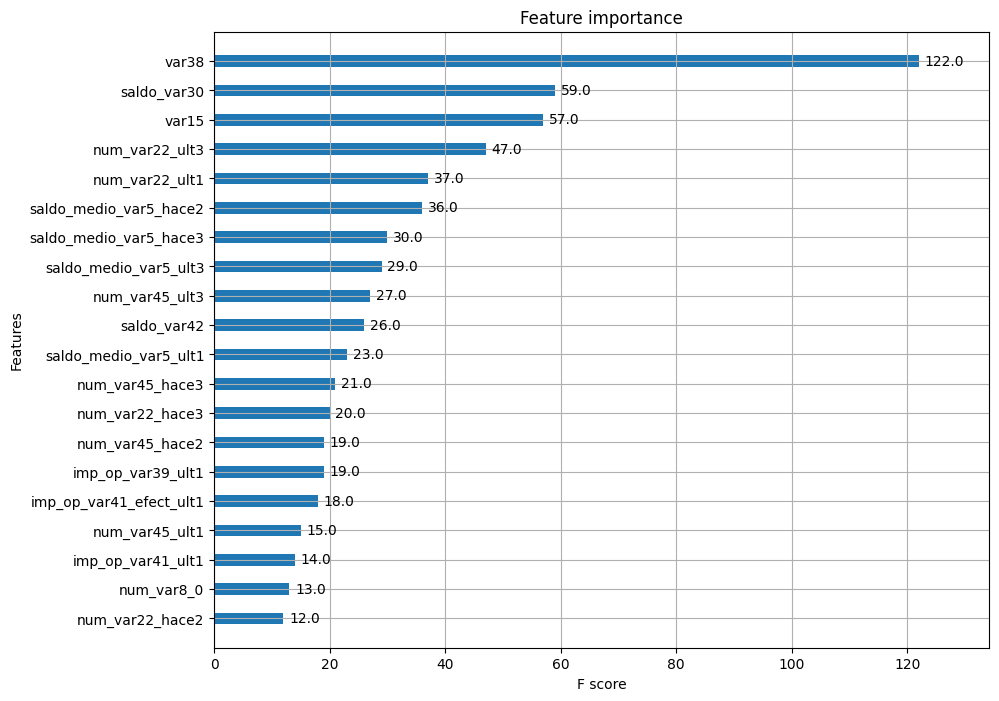

In [25]:
# 피처 중요도

from xgboost import plot_importance
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 1, figsize = (10, 8))
plot_importance(xgb, ax = axs, max_num_features = 20, height = 0.4)

In [26]:
# LightGBM
# 학습

from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(n_estimators = 500, early_stopping_round = 100)
lgbm.fit(X_train, y_train, eval_metric = "auc", eval_set = [(X_test, y_test)])
y_prob = lgbm.predict_proba(X_test)[:, 1]
print(roc_auc_score(y_test, y_prob))

[LightGBM] [Info] Number of positive: 2406, number of negative: 58410
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013444 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14354
[LightGBM] [Info] Number of data points in the train set: 60816, number of used features: 255
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.039562 -> initscore=-3.189521
[LightGBM] [Info] Start training from score -3.189521
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[39]	valid_0's auc: 0.8317	valid_0's binary_logloss: 0.135255
0.8316999423462221


In [27]:
# 파라미터 튜닝

lgbm = LGBMClassifier(n_estimators = 500, early_stopping_round = 30)
params = {
    'num_leaves' : [32, 64],
    'max_depth' : [128, 160],
    'min_child_samples' : [60, 100],
    'subsample' : [0.8, 1]
}
cv = GridSearchCV(lgbm, param_grid = params, cv = 5)
cv.fit(X_train, y_train, eval_metric = "auc", eval_set = [(X_test, y_test)])
print(cv.best_params_)
y_prob = cv.predict_proba(X_test)[:, 1]
print(roc_auc_score(y_test, y_prob))

[LightGBM] [Info] Number of positive: 1924, number of negative: 46728
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009639 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13568
[LightGBM] [Info] Number of data points in the train set: 48652, number of used features: 212
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.039546 -> initscore=-3.189937
[LightGBM] [Info] Start training from score -3.189937
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[39]	valid_0's auc: 0.831127	valid_0's binary_logloss: 0.135265
[LightGBM] [Info] Number of positive: 1925, number of negative: 46728
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_c

In [28]:
# 테스트

lgbm = LGBMClassifier(n_estimators = 1000, early_stopping_round = 100, max_depth = 128, min_child_samples = 100, num_leaves = 32, subsample = 0.8)
lgbm.fit(X_train, y_train, eval_metric = "auc", eval_set = [(X_test, y_test)])
y_prob = lgbm.predict_proba(X_test)[:, 1]
print(roc_auc_score(y_test, y_prob))

[LightGBM] [Info] Number of positive: 2406, number of negative: 58410
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008073 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13851
[LightGBM] [Info] Number of data points in the train set: 60816, number of used features: 203
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.039562 -> initscore=-3.189521
[LightGBM] [Info] Start training from score -3.189521
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[36]	valid_0's auc: 0.832042	valid_0's binary_logloss: 0.134938
0.8320419630315058


# 신용카드 사기 검출
### - 클래스 레이블 : Class
- 0 : 정상
- 1 : 사기
- 매우 불균형함 : 레이블 1이 전체의 0.172%
### - 레이블 불균형
- 건수 적은 레이블 데이터 : 다양한 유형을 학습하지 못함
- 건수 많은 레이블 데이터 : 일방적으로 치우친 학습  
-> 예측 성능 문제 발생

# 언더 샘플링 (Undersampling)
### - 다수 클래스 데이터 수 감소
### - 데이터 제거로 인한 정보 손실
1. Random Undersampling
- 무작위로 제거 -> 할 때마다 결과가 달라짐
2. Tomek Links
- 다수 클래스 데이터 x, 소수 클래스 데이터 y
- x와 y 거리보다 가까운 데이터가 없음 -> Tomek Link
- Tomek Link들을 찾은 후 다수 클래스의 데이터 삭제
![Alt text](image-128.png)
3. CNN (Condensed Nearest Neighbor)
- 소수 클래스 데이터 전체 + 다수 클래스 데이터 무작위 한 개
- 1-NN 로 분류
- 다수 클래스로 분류된 데이터 삭제
![Alt text](image-129.png)
4. OSS (One-Side Selection)
- Tomek Links + CNN
---
# 오버 샘플링 (Oversampling)
### - 적은 데이터 세트를 증식하여 충분한 데이터 확보
1. Resampling
- 소수 클래스 데이터 복제 -> 과적합
2. SMOTE (Synthetic Minority Over-sampling Technique)
- 소수 클래스 데이터에서 임의로 하나 선택 p1
- 선택된 데이터에서 가장 가까운 k개 데이터 (k > 1)
- k개 데이터 중 임의로 하나 선택 p2
- p1과 p2를 잇는 직선 상의 임의의 위치에 데이터 생성
- 다시 1번으로 돌아가 나머지 소수 클래스 데이터에 대해 반복
![Alt text](image-130.png)
3. Borderline - SMOTE
- 클래스 간의 경계 부분에서만 SMOTE
4. ADASYN (Adaptive Synthetic sampling approach)
- 위치에 따라 샘플링 개수를 다르게
![Alt text](image-131.png)


In [29]:
# 신용카드 사기 검출 : 데이터 읽기

df = pd.read_csv('C:/woogi/KWU/3-2/Machine_Learning/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


![Alt text](image-132.png)

In [30]:
# 전처리

df.drop('Time', axis = 1, inplace = True)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)
print(y_train.value_counts() / y_train.shape[0] * 100)
print(y_test.value_counts() / y_test.shape[0] * 100)

Class
0    99.827451
1     0.172549
Name: count, dtype: float64
Class
0    99.826785
1     0.173215
Name: count, dtype: float64


In [31]:
# 학습 & 테스트
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def evaluate(y_test, y_hat, y_prob):
    print(confusion_matrix(y_test, y_hat))
    print(accuracy_score(y_test, y_hat))
    print(precision_score(y_test, y_hat))
    print(recall_score(y_test, y_hat))
    print(f1_score(y_test, y_hat))
    print(roc_auc_score(y_test, y_prob))
    
def test(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_hat = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    evaluate(y_test, y_hat, y_prob)

lr = LogisticRegression(solver = 'liblinear')
test(lr, X_train, X_test, y_train, y_test)

[[85279    16]
 [   57    91]]
0.9991456292499094
0.8504672897196262
0.6148648648648649
0.7137254901960786
0.9728227788137513


In [32]:
# 학습 & 테스트
# LightGBM

lgbm = LGBMClassifier(n_estimators = 1000, num_leaves = 64, boost_from_average = False)
test(lgbm, X_train, X_test, y_train, y_test)

[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005945 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

![Alt text](image-133.png)

<Axes: >

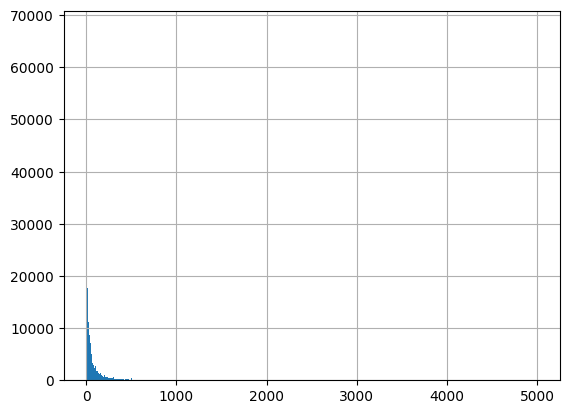

In [33]:
# 데이터 분포 변환

df['Amount'].hist(bins = 1000, range = (0, 5000)) 

In [34]:
# Amount 를 정규 분포로 변환

from sklearn.preprocessing import StandardScaler

df['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)

lr = LogisticRegression(solver = 'liblinear')
test(lr, X_train, X_test, y_train, y_test)

lgbm = LGBMClassifier(n_estimators = 1000, num_leaves = 64, boost_from_average = False)
test(lgbm, X_train, X_test, y_train, y_test)

[[85283    12]
 [   56    92]]
0.999204147794436
0.8846153846153846
0.6216216216216216
0.7301587301587302
0.9689345245356735
[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006961 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

![Alt text](image-134.png)

In [35]:
# log 변환

import numpy as np

df['Amount'] = np.log1p(df['Amount'])
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)
test(lr, X_train, X_test, y_train, y_test)
test(lgbm, X_train, X_test, y_train, y_test)

[[85280    15]
 [   50    98]]
0.9992392589211521
0.8672566371681416
0.6621621621621622
0.7509578544061302
0.9850228063810337
[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007221 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

![Alt text](image-135.png)

# 이상치 제거
### - 이상치(Outlier) 찾는 방법
- IQR (Inter Quantile Range) : 사분위 값의 편차 이용
![Alt text](image-136.png)

<Axes: >

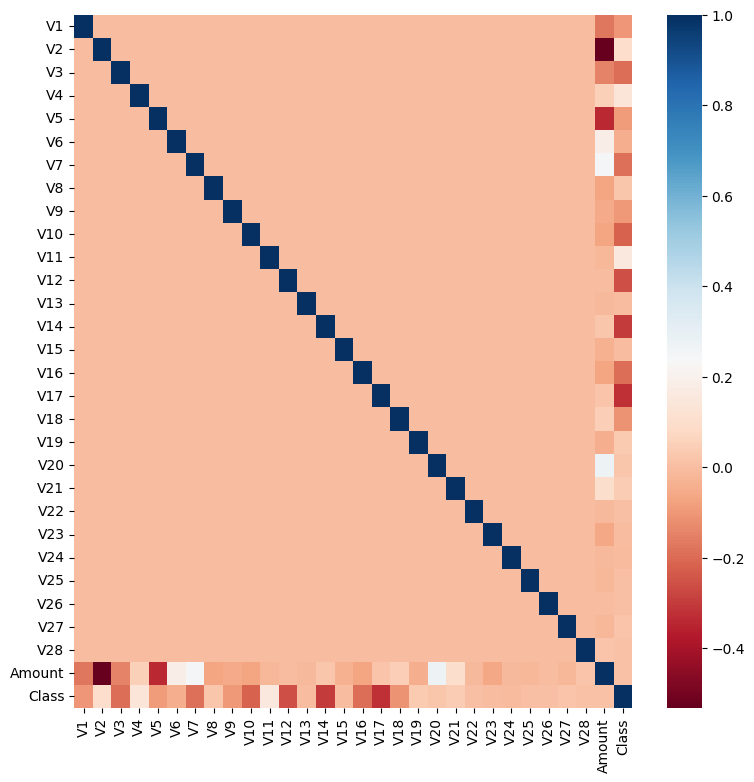

In [36]:
# 각 피처별 상관도 분석

import seaborn as sb

plt.figure(figsize = (9, 9))
sb.heatmap(df.corr(), cmap = 'RdBu')

### 양의 상관 관계 : 파란색
### 음의 상관 관계 : 빨간색
### -> Class와 음의 상관 관계가 가장 높은 피처 : V14, V17

In [37]:
# V14에 대해 이상치 제거

def get_outlier(df, column, weight = 1.5):
    col = df[df['Class'] == 1][column]
    perc25 = np.percentile(col.values, 25)
    perc75 = np.percentile(col.values, 75)
    iqr = (perc75 - perc25) * weight
    lowest = perc25 - iqr
    highest = perc75 + iqr
    return col[(col < lowest) | (col > highest)].index

index = get_outlier(df, 'V14')
print(index)

Index([8296, 8615, 9035, 9252], dtype='int64')


In [38]:
df.drop(index, axis = 0, inplace = True)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)
test(lr, X_train, X_test, y_train, y_test)
test(lgbm, X_train, X_test, y_train, y_test)

[[85279    16]
 [   52    94]]
0.9992041291651549
0.8545454545454545
0.6438356164383562
0.7343750000000001
0.9817526120065172
[LightGBM] [Info] Number of positive: 342, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006649 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199362, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

![Alt text](image-137.png)

In [39]:
# SMOTE
# 학습 데이터 세트만 SMOTE

from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)
print(y_train.value_counts())

Class
0    199020
1    199020
Name: count, dtype: int64


In [40]:
# Logistic Regression

lr = LogisticRegression()
test(lr, X_train, X_test, y_train, y_test)

[[83083  2212]
 [    9   137]]
0.9740054540560152
0.05832269050659855
0.9383561643835616
0.1098196392785571
0.9841353176365346


![Alt text](image-138.png)

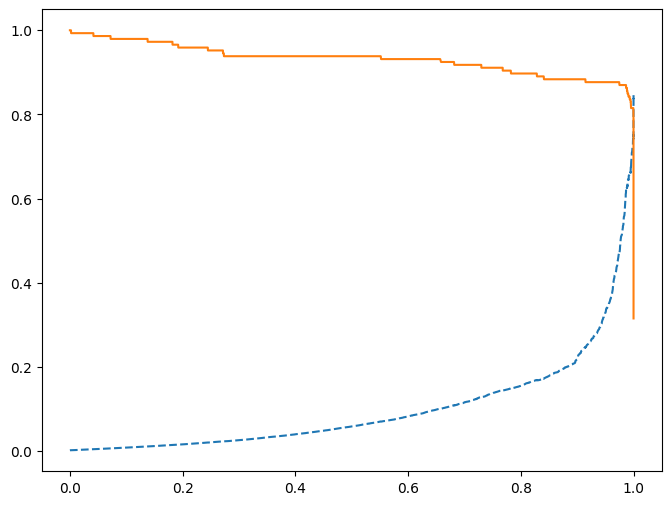

In [41]:
from sklearn.metrics import precision_recall_curve

lr.fit(X_train, y_train)
y_hat = lr.predict(X_test)
y_prob = lr.predict_proba(X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)
boundary = thresholds.shape[0]

plt.figure(figsize = (8, 6))
plt.plot(thresholds, precisions[:boundary], linestyle = '--')
plt.plot(thresholds, recalls[:boundary])

In [42]:
# LightGBM

lgbm = LGBMClassifier(n_estimators = 1000, num_leaves = 64, boost_from_average = False)
test(lgbm, X_train, X_test, y_train, y_test)

[LightGBM] [Info] Number of positive: 199020, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012832 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 398040, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

![Alt text](image-139.png)

# 회귀 트리
### - 일반적인 회귀
- 회귀 함수를 구하고
- 입력에 대한 결과 값을 예측
### - 회귀 트리
- 회귀 함수를 구하지 않음
- 트리 기반
- 리프 노드에 속함 데이터 값의 평균 값으로 예측 값을 계산
![Alt text](image-140.png)
![Alt text](image-141.png)

### 아 load_boston 진짜 ㅋㅋ
![Alt text](image-142.png)
![Alt text](image-143.png)
![Alt text](image-144.png)
![Alt text](image-145.png)
![Alt text](image-146.png)
![Alt text](image-147.png)

# 스태킹 (Stacking) 앙상블
### - 여러 알고리즘을 결합해 예측 결과를 도출
- -> 배깅, 부스팅과 비슷
### - 개별 알고리즘으로 예측한 데이터를 기반으로 다시 예측을 수행한다는 점이 차이점
### - 두 종류의 모델 필요
- 개별적인 학습 모델
- 개별 모델의 예측 데이터를 학습 데이터로 학습하는 모델
![Alt text](image-148.png)
### - M개의 레코드, N개의 피처 데이터
![Alt text](image-149.png)
![Alt text](image-150.png)
![Alt text](image-151.png)

# CV 세트 기반의 스태킹
### - 과적합을 개선하기 위해 교차 검증 기반으로 예측된 결과 데이터 세트를 이용
![Alt text](image-152.png)
![Alt text](image-153.png)
![Alt text](image-154.png)
![Alt text](image-155.png)
![Alt text](image-156.png)
### - 개별 모델별로 하이퍼 파라미터 튜닝 후 스태킹하는 것이 일반적인 방식

# 자전거 대여 수요 예측
![Alt text](image-159.png)

In [43]:
# 데이터 전처리

import pandas as pd

df = pd.read_csv('C:/woogi/KWU/3-2/Machine_Learning/bike.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [45]:
# 데이터 전처리
# datetime (object 형) -> 연도, 월, 일, 시간으로 분리

df['datetime'] = df['datetime'].apply(pd.to_datetime)
df['year'] = df['datetime'].apply(lambda x : x.year)
df['month'] = df['datetime'].apply(lambda x : x.month)
df['day'] = df['datetime'].apply(lambda x : x.day)
df['hour'] = df['datetime'].apply(lambda x : x.hour)
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [46]:
df.drop(['datetime', 'casual', 'registered'], axis = 1, inplace = True)

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso

def evaluate(y_test, y_hat):
    rmse = np.sqrt(mean_squared_error(y_test, y_hat))
    mae = mean_absolute_error(y_test, y_hat)
    print(rmse, mae)
    
y = df['count']
X = df.drop(['count'], axis = 1, inplace = False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_hat = lr.predict(X_test)
evaluate(y_test, y_hat)

138.6285156189453 105.28477966831866


<Axes: >

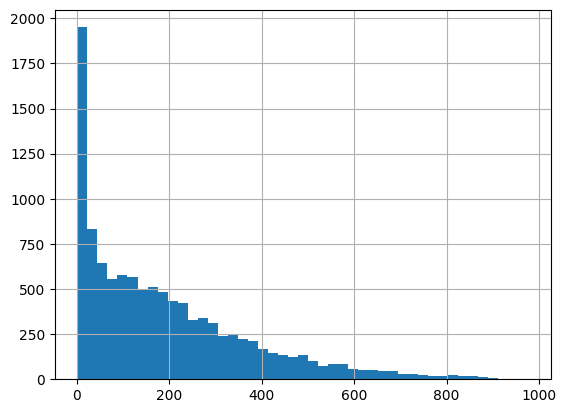

In [48]:
# 로그 변환

# 타겟 값 분포 확인 (왜곡되어 있지 않은지?)

y.hist(bins = 'auto') # 로그 변환을 통해 정규화

<Axes: >

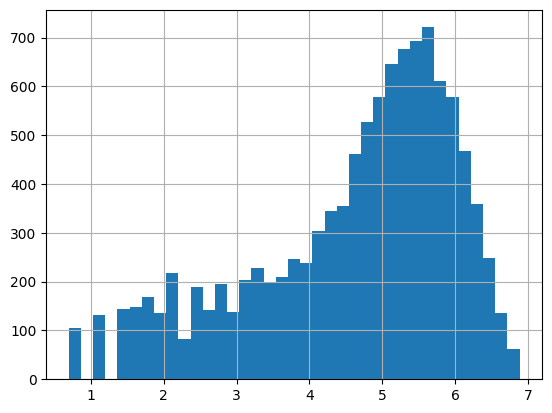

In [49]:
y_log = np.log1p(y)
y_log.hist(bins = 'auto')

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size = 0.3)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_hat = lr.predict(X_test)

y_test_exp = np.expm1(y_test)
y_hat_exp = np.expm1(y_hat)
evaluate(y_test_exp, y_hat_exp)

161.23477583476262 106.4529711597041


![Alt text](image-160.png)

<BarContainer object of 12 artists>

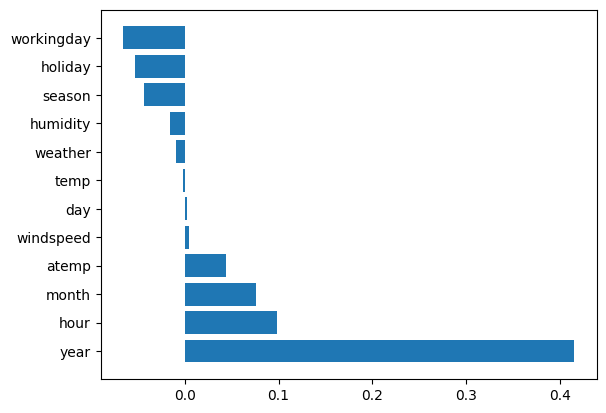

In [51]:
# 피처 인코딩

# 회귀 계수 값 시각화

import matplotlib.pyplot as plt

coef = pd.DataFrame(data = lr.coef_, columns = ['value'])
coef['name'] = X.columns
sorted = coef.sort_values(by = 'value', ascending = False)
plt.barh(sorted['name'], sorted['value'])

![Alt text](image-161.png)

In [52]:
# 카테고리형 피처 -> 원핫 인코딩
# year, month, day, hour, holiday, workingday, season, weather

X_ohe = pd.get_dummies(X, columns = ['year', 'month', 'hour', 'holiday', 'workingday', 'season', 'weather'])
X_train, X_test, y_train, y_test = train_test_split(X_ohe, y_log, test_size = 0.3)
lr = LinearRegression()
ridge = Ridge(alpha = 10)
lasso = Lasso(alpha = 0.01)

def test(model, X_train, y_train, X_test):
    model.fit(X_train, y_train)
    y_hat = model.predict(X_test)
    y_test_exp = np.expm1(y_test)
    y_hat_exp = np.expm1(y_hat)
    evaluate(y_test_exp, y_hat_exp)
    
test(lr, X_train, y_train, X_test)
test(ridge, X_train, y_train, X_test)
test(lasso, X_train, y_train, X_test)

97.9091421280308 63.206995034066026
99.18091047054779 63.92473963026777
115.493026946386 73.47679098654902


![Alt text](image-162.png)

<BarContainer object of 20 artists>

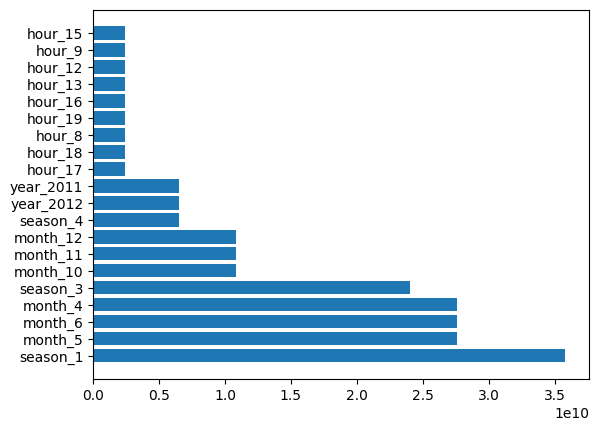

In [53]:
# 회귀 계수 값 시각화

coef = pd.DataFrame(data = lr.coef_, columns = ['value'])
coef['name'] = X_ohe.columns
sorted = coef.sort_values(by = 'value', ascending = False)[:20]
plt.barh(sorted['name'], sorted['value'])

In [54]:
# 회귀 트리

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

force_row_wise=True
force_col_wise=True

rf = RandomForestRegressor(n_estimators = 500)
gbm = GradientBoostingRegressor(n_estimators = 500)
xgb = XGBRegressor(n_estimators = 500)
lgbm = LGBMRegressor(n_estimators = 500)

test(rf, X_train, y_train, X_test)
test(gbm, X_train, y_train, X_test)
test(xgb, X_train, y_train, X_test)
test(lgbm, X_train, y_train, X_test)

48.39482070639966 30.005759405387767
52.766250914290914 32.6102120576394


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

48.830861042811506 30.026417509369228
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000156 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 329
[LightGBM] [Info] Number of data points in the train set: 7620, number of used features: 54
[LightGBM] [Info] Start training from score 4.601655
46.15099505381587 28.23252313871316


In [55]:
# 주택 가격 : 고급 회귀 기법

# 데이터 전처리

df = pd.read_csv('C:/woogi/KWU/3-2/Machine_Learning/house.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [57]:
null_sum = df.isnull().sum()
null_sum[null_sum > 0].sort_values()

Electrical         1
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageYrBlt       81
GarageType        81
LotFrontage      259
FireplaceQu      690
MasVnrType       872
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64

In [59]:
df.drop(['Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis = 1, inplace = True)
df.fillna(df.mean(numeric_only = True), inplace = True)
null_sum = df.isnull().sum()
null_counts = null_sum[null_sum > 0]
print(df.dtypes[null_counts.index])

MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object


In [60]:
df_ohe = pd.get_dummies(df)
null_sum = df_ohe.isnull().sum()
null_sum[null_sum > 0].sort_values()

Series([], dtype: int64)

<Axes: >

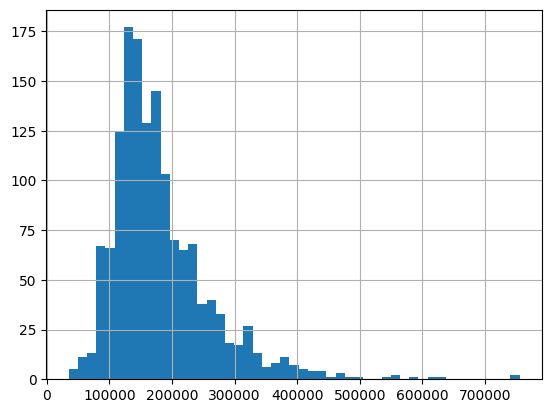

In [61]:
df_ohe['SalePrice'].hist(bins = 'auto')

<Axes: >

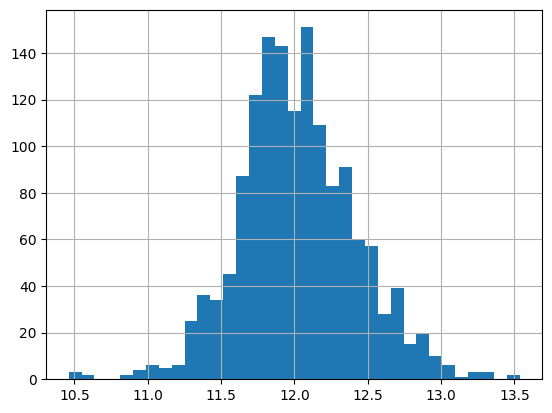

In [62]:
y_log = np.log1p(df_ohe['SalePrice'])
y_log.hist(bins = 'auto')

In [63]:
# 학습 및 평가

X = df_ohe.drop('SalePrice', axis = 1, inplace = False)
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size = 0.2)

def test(model, X_train, y_train, X_test):
    model.fit(X_train, y_train)
    y_hat = model.predict(X_test)
    evaluate(y_test, y_hat)
    
lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()

test(lr, X_train, y_train, X_test)
test(ridge, X_train, y_train, X_test)
test(lasso, X_train, y_train, X_test)

0.12824487176665297 0.08778198965441088
0.12691910589184688 0.08977202742572889
0.16438883424362324 0.11505642490044359


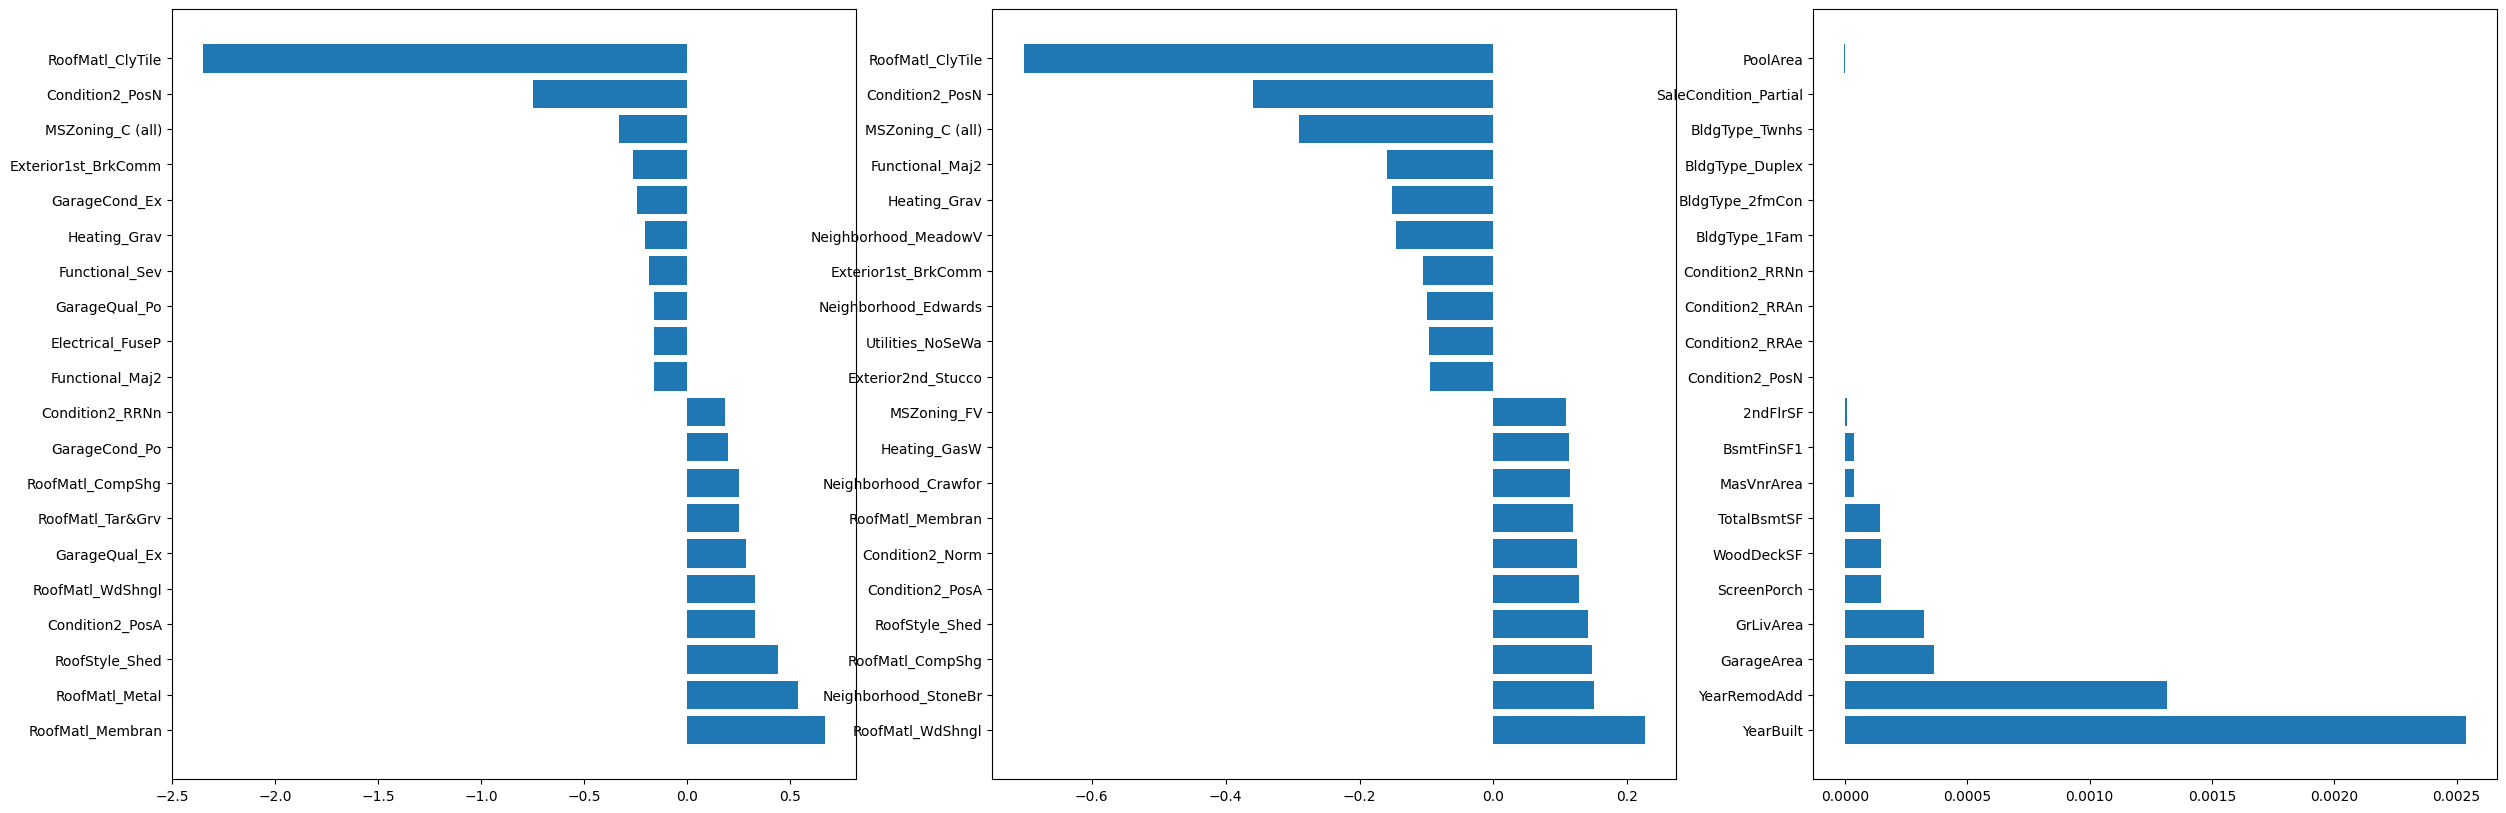

In [64]:
def visualize(model, columns, axs):
    coef = pd.DataFrame(data = model.coef_, columns = ['value'])
    coef['name'] = columns
    sorted = coef.sort_values(by = 'value', ascending = False)
    head = sorted.head(10)
    tail = sorted.tail(10)
    coef = pd.concat([head, tail])
    axs.barh(coef['name'], coef['value'])
    
fig, axs = plt.subplots(figsize = (30, 10), nrows = 1, ncols = 3)
visualize(lr, X.columns, axs[0])
visualize(ridge, X.columns, axs[1])
visualize(lasso, X.columns, axs[2])

In [70]:
from sklearn.model_selection import cross_val_score

def avg_rmse_cv(model, X, y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring = 'neg_mean_squared_error', cv = 5))
    print(np.mean(rmse))
    
avg_rmse_cv(lr, X, y_log)
avg_rmse_cv(ridge, X, y_log)
avg_rmse_cv(lasso, X, y_log)

312.53897497865006
0.14387174006693768
0.1976622573181429


In [71]:
from sklearn.model_selection import GridSearchCV

def grid_search_cv(model, X, y, params):
    cv = GridSearchCV(model, param_grid = params, scoring = 'neg_mean_squared_error', cv = 5)
    cv.fit(X, y)
    rmse = np.sqrt(-1 * cv.best_score_)
    print(rmse)
    print(cv.best_params_)
    
ridge_params = {
    'alpha' : [0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]
}
lasso_params = {
    'alpha' : [0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]
}
grid_search_cv(ridge, X, y_log, ridge_params)
grid_search_cv(lasso, X, y_log, lasso_params)

0.14177665537524922
{'alpha': 12}
0.14198359533743315
{'alpha': 0.001}


0.12824487176665297 0.08778198965441088
0.12403511804780036 0.08798961562367771
0.11940871954687222 0.0849011717755218


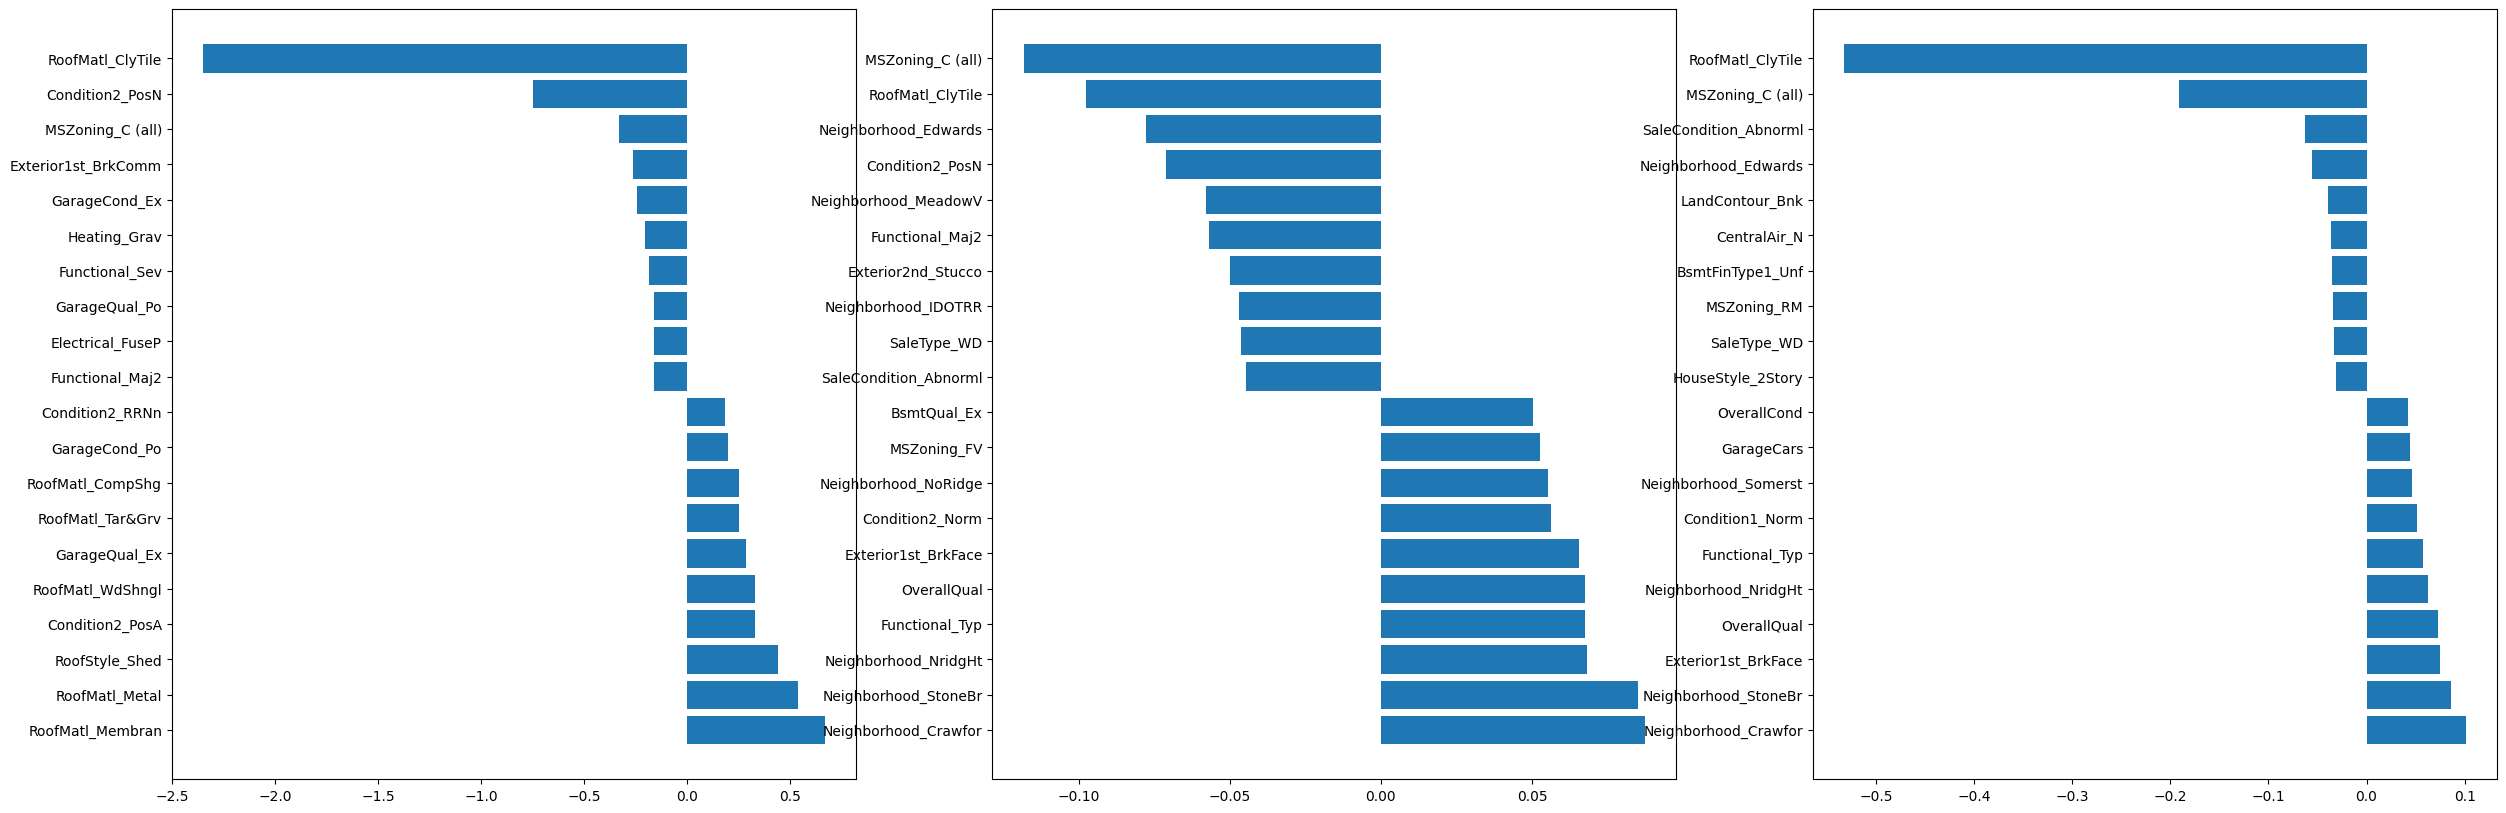

In [74]:
lr = LinearRegression()
ridge = Ridge(alpha = 12)
lasso = Lasso(alpha = 0.001)

test(lr, X_train, y_train, X_test)
test(ridge, X_train, y_train, X_test)
test(lasso, X_train, y_train, X_test)

fig, axs = plt.subplots(figsize = (30, 10), nrows = 1, ncols = 3)
visualize(lr, X.columns, axs[0])
visualize(ridge, X.columns, axs[1])
visualize(lasso, X.columns, axs[2])

In [75]:
from scipy.stats import skew

index = df.dtypes[df.dtypes != 'object'].index
df_skew = df[index].apply(lambda x : skew(x))
df_skew = df_skew[df_skew > 1]
print(df_skew.sort_values(ascending = False))

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.673661
LotFrontage       2.382499
OpenPorchSF       2.361912
SalePrice         1.880941
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
dtype: float64


In [76]:
df[df_skew.index] = np.log1p(df[df_skew.index])
df_ohe = pd.get_dummies(df)
y_log = np.log1p(df_ohe['SalePrice'])
X = df_ohe.drop('SalePrice', axis = 1, inplace = False)
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size = 0.2)
grid_search_cv(ridge, X, y_log, ridge_params)
grid_search_cv(lasso, X, y_log, lasso_params)

0.00986734996280139
{'alpha': 10}
0.012120261618384177
{'alpha': 0.001}


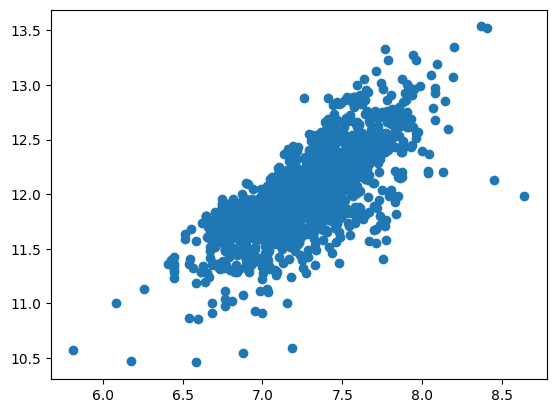

In [77]:
plt.scatter(x = df_ohe['GrLivArea'], y = df_ohe['SalePrice'])

In [78]:
cond1 = df_ohe['GrLivArea'] > 8.2
cond2 = df_ohe['SalePrice'] < 12.5
index_outlier = df_ohe[cond1 & cond2].index
print(index_outlier)
df_ohe.drop(index_outlier, axis = 0, inplace = True)

Index([523, 1298], dtype='int64')


In [79]:
y_log = np.log1p(df_ohe['SalePrice'])
X = df_ohe.drop('SalePrice', axis = 1, inplace = False)
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size = 0.2)
grid_search_cv(ridge, X, y_log, ridge_params)
grid_search_cv(lasso, X, y_log, lasso_params)

0.008766761504544036
{'alpha': 8}
0.011360487106294996
{'alpha': 0.001}


0.009620220989387156 0.006112441645045519
0.00941293095575667 0.005985476730992129
0.012018773493673938 0.008439320053148153


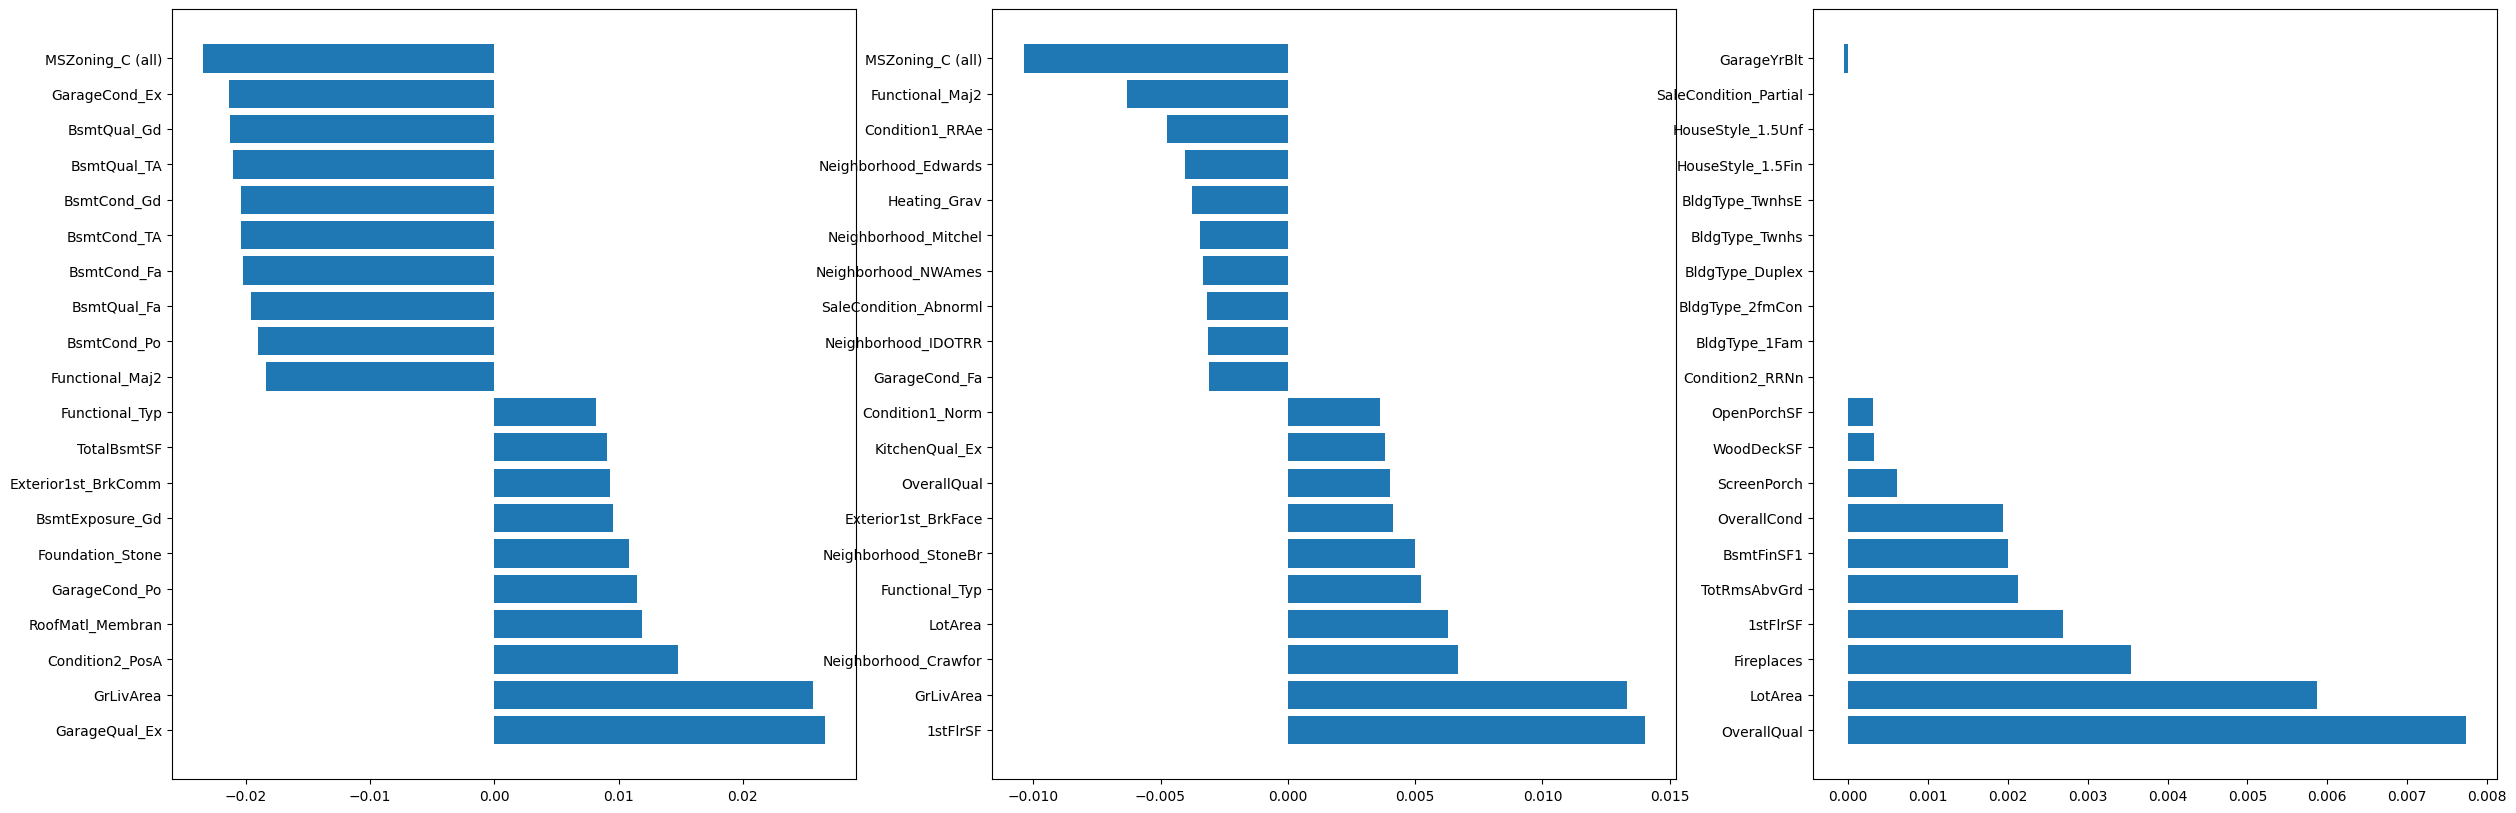

In [80]:
lr = LinearRegression()
ridge = Ridge(alpha = 8)
lasso = Lasso(alpha = 0.001)

test(lr, X_train, y_train, X_test)
test(ridge, X_train, y_train, X_test)
test(lasso, X_train, y_train, X_test)

fig, axs = plt.subplots(figsize = (30, 10), nrows = 1, ncols = 3)
visualize(lr, X.columns, axs[0])
visualize(ridge, X.columns, axs[1])
visualize(lasso, X.columns, axs[2])

In [81]:
# 회귀 트리

xgb_params = {
    'n_estimators' : [500, 1000, 1500],
    'learning_rate' : [0.03, 0.05, 0.07],
    'colsample_bytree' : [0.3, 0.5],
    'subsample' : [0.7, 0.8]
}
xgb = XGBRegressor()
grid_search_cv(xgb, X, y_log, xgb_params)

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

0.009153894126198114
{'colsample_bytree': 0.5, 'learning_rate': 0.03, 'n_estimators': 500, 'subsample': 0.7}


In [82]:
lgbm_params = {
    'n_estimators' : [500, 1000, 1500],
    'learning_rate' : [0.03, 0.05, 0.07],
    'colsample_bytree' : [0.3, 0.5],
    'subsample' : [0.7, 0.8],
    'num_leaves' : [3, 4],
    'reg_lambda' : [5, 10]
}
lgbm = LGBMRegressor()
grid_search_cv(lgbm, X, y_log, lgbm_params)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001168 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3155
[LightGBM] [Info] Number of data points in the train set: 1166, number of used features: 171
[LightGBM] [Info] Start training from score 2.566113
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000694 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3167
[LightGBM] [Info] Number of data points in the train set: 1166, number of used features: 168
[LightGBM] [Info] Start training from score 2.566302
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of te

In [83]:
# 예측 결과 혼합

ridge = Ridge(alpha = 8)
lasso = Lasso(alpha = 0.001)

ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

y_hat_ridge = ridge.predict(X_test)
y_hat_lasso = lasso.predict(X_test)
y_hat = 0.4 * y_hat_ridge + 0.6 * y_hat_lasso

evaluate(y_test, y_hat_lasso)
evaluate(y_test, y_hat_lasso)
evaluate(y_test, y_hat)

0.012018773493673938 0.008439320053148153
0.012018773493673938 0.008439320053148153
0.010359582515644795 0.006861188508155007


In [84]:
xgb = XGBRegressor(n_estimators = 500, learning_rate = 0.03, colsample_bytree = 0.5, subsample = 0.7)
lgbm = LGBMRegressor(n_estimators = 1000, learning_rate = 0.05, colsample_bytree = 0.3, subsample = 0.7, num_leaves = 4, reg_lambda = 5)

xgb.fit(X_train, y_train)
lgbm.fit(X_train, y_train)

y_hat_xgb = xgb.predict(X_test)
y_hat_lgbm = lgbm.predict(X_test)
y_hat = 0.5 * y_hat_xgb + 0.5 * y_hat_lgbm

evaluate(y_test, y_hat_xgb)
evaluate(y_test, y_hat_lgbm)
evaluate(y_test, y_hat)

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000956 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3160
[LightGBM] [Info] Number of data points in the train set: 1166, number of used features: 168
[LightGBM] [Info] Start training from score 2.566398
0.010238112305158505 0.0064349880541255235
0.010067524321025237 0.0061015904143889655
0.009968418929839077 0.0060873110437420636


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

In [85]:
# 스태킹 앙상블

from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

def get_data_sets(model, X_train, y_train, X_test, n_folds):
    kfold = KFold(n_splits = n_folds, shuffle = False)
    y_hat_train = np.zeros((X_train.shape[0], 1))
    y_hat_test = np.zeros((X_test.shape[0], n_folds))
    
    for index_fold, (index_train, index_valid) in enumerate(kfold.split(X_train)):
        _X_train = X_train[index_train]
        _y_train = y_train[index_train]
        _X_valid = X_train[index_valid]
        model.fit(_X_train, _y_train)
        y_hat_train[index_valid, :] = model.predict(_X_valid).reshape(-1, 1)
        y_hat_test[:, index_fold] = model.predict(X_test)
    y_hat = np.mean(y_hat_test, axis = 1).reshape(-1, 1)
    return y_hat_train, y_hat

X_ridge_train, X_ridge_test = get_data_sets(ridge, X_train.values, y_train.values, X_test.values, 5)
X_lasso_train, X_lasso_test = get_data_sets(lasso, X_train.values, y_train.values, X_test.values, 5)
X_xgb_train, X_xgb_test = get_data_sets(xgb, X_train.values, y_train.values, X_test.values, 5)
X_lgbm_train, X_lgbm_test = get_data_sets(lgbm, X_train.values, y_train.values, X_test.values, 5)   

X_train = np.concatenate((X_ridge_train, X_lasso_train, X_xgb_train, X_lgbm_train), axis = 1)
X_test = np.concatenate((X_ridge_test, X_lasso_test, X_xgb_test, X_lasso_test), axis = 1)

model = Lasso(alpha = 0.0005)
model.fit(X_train, y_train)
y_hat = model.predict(X_test)
evaluate(y_test, y_hat) 

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000608 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2938
[LightGBM] [Info] Number of data points in the train set: 932, number of used features: 158
[LightGBM] [Info] Start training from score 2.566957
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000914 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2944
[LightGBM] [Info] Number of data points in the train set: 933, number of used features: 157
[LightGBM] [Info] Start training from score 2.565794
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000558 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins